<h2>Using 2019 survey Dataset</h2> to draw insights into trends and important topics in Data Analysis.

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
# read in the results from the kaggle multiple choices
df = pd.read_csv("multiple_choice_responses.csv", engine = 'python', skiprows=(1,1), encoding='utf-8', error_bad_lines=False)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,-1,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [0]:
print(df.shape)
for col in df.columns: 
    print(col) 

(19717, 246)
Time from Start to Finish (seconds)
Q1
Q2
Q2_OTHER_TEXT
Q3
Q4
Q5
Q5_OTHER_TEXT
Q6
Q7
Q8
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_4
Q9_Part_5
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q9_OTHER_TEXT
Q10
Q11
Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_Part_4
Q12_Part_5
Q12_Part_6
Q12_Part_7
Q12_Part_8
Q12_Part_9
Q12_Part_10
Q12_Part_11
Q12_Part_12
Q12_OTHER_TEXT
Q13_Part_1
Q13_Part_2
Q13_Part_3
Q13_Part_4
Q13_Part_5
Q13_Part_6
Q13_Part_7
Q13_Part_8
Q13_Part_9
Q13_Part_10
Q13_Part_11
Q13_Part_12
Q13_OTHER_TEXT
Q14
Q14_Part_1_TEXT
Q14_Part_2_TEXT
Q14_Part_3_TEXT
Q14_Part_4_TEXT
Q14_Part_5_TEXT
Q14_OTHER_TEXT
Q15
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_OTHER_TEXT
Q17_Part_1
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_6
Q17_Part_7
Q17_Part_8
Q17_Part_9
Q17_Part_10
Q17_Part_11
Q17_Part_12
Q17_OTHER_TEXT
Q18_Part_1
Q18_Part_2
Q18_Part_3
Q18_Part_4
Q18_Part_5
Q18_Part_6
Q18_Part_7
Q18_Part_8
Q18_Pa

In [0]:
#getting the list of questions
questions = pd.read_csv('questions_only.csv')
questions.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,Have you ever used a TPU (tensor processing un...,For how many years have you used machine learn...,Which of the following ML algorithms do you us...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [0]:
for question in questions.iloc[0]:
  print(question)

Duration (in seconds)
What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
What is the size of the company where you are employed?
Approximately how many individuals are responsible for data science workloads at your place of business?
Does your current employer incorporate machine learning methods into their business?
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
What is your current yearly compensation (approximate $USD)?
Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Who/what are your favorite media sources that report on data science topics? (Select all that apply

In [0]:
df_data = df.loc[:,["Q1", "Q2", "Q3", "Q4", "Q5", "Q10", "Q11"]]
df_data.columns = ["Age", "Gender", "Country", "Education", "Job_Title", "Salary", "Spending"]

In [0]:
df_data.head()

,Age,Gender,Country,Education,Job_Title,Salary,Spending
0,22-24,Male,France,Master’s degree,Software Engineer,"30,000-39,999",$0 (USD)
1,40-44,Male,India,Professional degree,Software Engineer,"5,000-7,499","> $100,000 ($USD)"
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"250,000-299,999","$10,000-$99,999"
4,22-24,Male,India,Bachelor’s degree,Other,"4,000-4,999",$0 (USD)


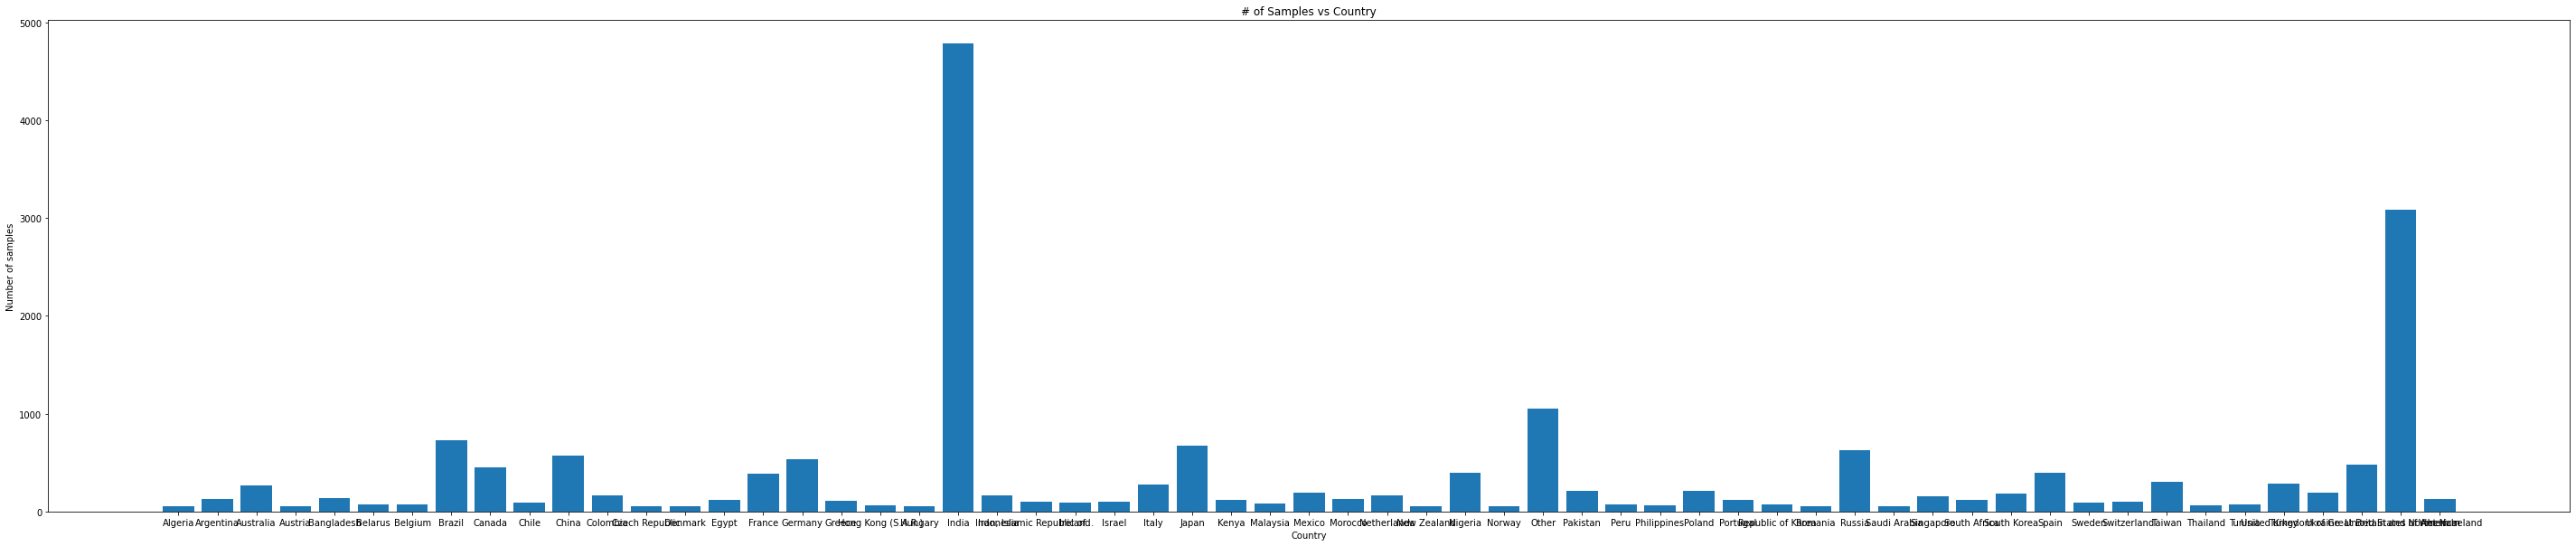

In [0]:
countries = df_data['Country'].values.tolist()
labels, counts = np.unique(countries, return_counts = True)

plt.figure(figsize=(50,10))
plt.bar(labels, counts)
plt.xlabel('Country')
plt.ylabel('Number of samples')
plt.title('# of Samples vs Country')
plt.show()

In [0]:
labels

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Colombia', 'Czech Republic', 'Denmark', 'Egypt', 'France',
       'Germany', 'Greece', 'Hong Kong (S.A.R.)', 'Hungary', 'India',
       'Indonesia', 'Iran, Islamic Republic of...', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kenya', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Other',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Republic of Korea', 'Romania', 'Russia', 'Saudi Arabia',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Viet Nam'], dtype='<U52')

In [0]:
#There are some repetation in country names so correcting them
df_data["Country"] = df_data["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom", regex=False)
df_data["Country"] = df_data["Country"].str.replace("United States of America","United States", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Iran, Islamic Republic of...","Iran", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Republic of Korea","South Korea", regex=False)
df_data["Country"] = df_data["Country"].str.replace("Viet Nam","Vietnam", regex=False)

India has the most number of samples.

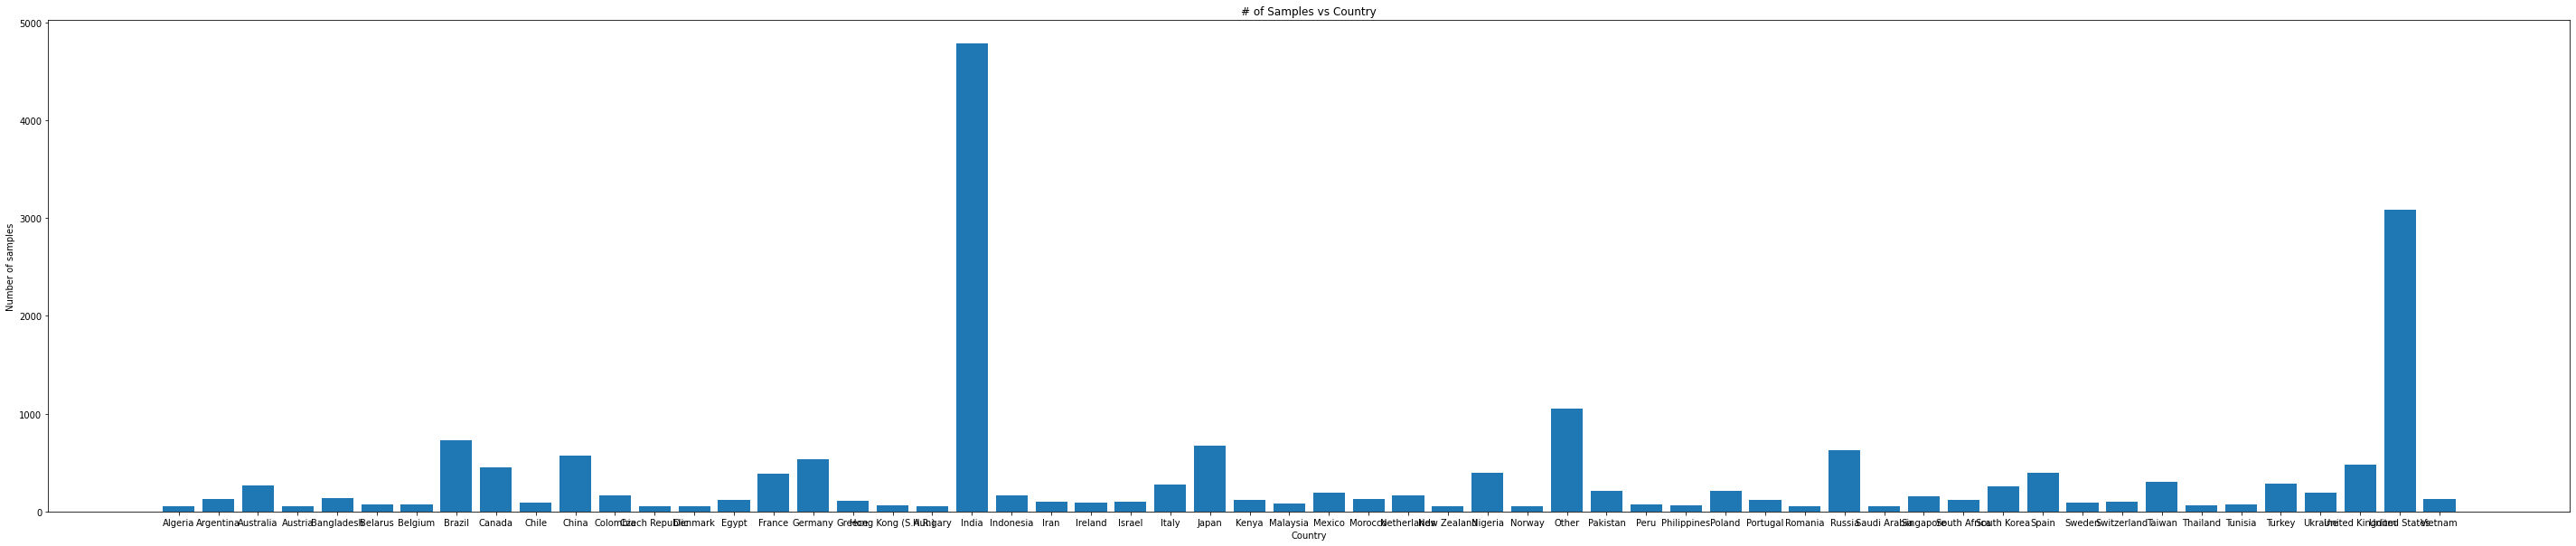

In [0]:
countries = df_data['Country'].values.tolist()
labels, counts = np.unique(countries, return_counts = True)
#Corrected bar plot
plt.figure(figsize=(50,10))
plt.bar(labels, counts)
plt.xlabel('Country')
plt.ylabel('Number of samples')
plt.title('# of Samples vs Country')
plt.show()

There are more than 1000 respondents from other countries in the survey. If a country or territory received less than 50 respondents, Kaggle grouped them into “Other”. {Note: They aren't able to show in the map (such as many African Countries)}

In [0]:
#Seperating the survey inputs of data-scientists
df_data_ds = df_data[df_data.Job_Title == "Data Scientist"]
print(df_data_ds.shape)
df_data_ds.head()

(4085, 7)


,Age,Gender,Country,Education,Job_Title,Salary,Spending
5,50-54,Male,France,Master’s degree,Data Scientist,"60,000-69,999","$10,000-$99,999"
6,22-24,Male,India,Master’s degree,Data Scientist,"10,000-14,999",$100-$999
7,22-24,Female,United States,Bachelor’s degree,Data Scientist,"80,000-89,999",$0 (USD)
12,30-34,Male,Germany,Bachelor’s degree,Data Scientist,"70,000-79,999","$1000-$9,999"
31,30-34,Male,Japan,Master’s degree,Data Scientist,"7,500-9,999",$100-$999


In [0]:
#Creating a dataframe with number of male and female survey takers
df_ds_country = df_data_ds[df_data_ds.Country.isin(df_data_ds.Country.value_counts()[:25].index)].loc[:,["Country", "Gender"]].groupby(["Country", "Gender"]).size().reset_index()
df_ds_country.columns = ["Country", "Gender", "Count"]
df_ds_country.head()

,Country,Gender,Count
0,Australia,Female,12
1,Australia,Male,54
2,Brazil,Female,18
3,Brazil,Male,144
4,Brazil,Prefer not to say,2


In [0]:
df_ds_country[df_ds_country["Country"] == "India"]

,Country,Gender,Count
14,India,Female,100
15,India,Male,659
16,India,Prefer not to say,6


In [0]:
df_ds_country[df_ds_country["Country"] == "United States"]

,Country,Gender,Count
59,United States,Female,152
60,United States,Male,614
61,United States,Prefer not to say,14
62,United States,Prefer to self-describe,2


India and US have a lot of survey points infact most of the data points are filled by someone from India or US.

Selecting only Data science related entries and 

<b> Encoding education level</b> and using it as a feature.

In [0]:
np.unique(df["Q5"].values.tolist())

array(['Business Analyst', 'DBA/Database Engineer', 'Data Analyst',
       'Data Engineer', 'Data Scientist', 'Not employed', 'Other',
       'Product/Project Manager', 'Research Scientist',
       'Software Engineer', 'Statistician', 'Student', 'nan'],
      dtype='<U23')

In [0]:
L_data = ['Business Analyst', 'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',\
    'Data Scientist', 'Other', 'Product/Project Manager', 'Statistician', 'Student', 'nan']
df = df[df["Q5"].isin(L_data)]
print(df.shape)
df.head()

(13990, 246)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,-1,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,PostgresSQL,NaN,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1
6,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,NaN,NaN,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,NaN,NaN,-1,"10,000-14,999",$100-$999,NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)","Course Forums (forums.fast.ai, etc)","YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...",NaN,Journal Publications (traditional publications...,NaN,NaN,NaN,-1,Udacity,Coursera,edX,NaN,NaN,...,-1,SAS,NaN,Azure Machine Learning Studio,Google Cloud Machine Learning Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Google AutoML,NaN,NaN,NaN,Tpot,Auto-Keras,Auto-Sklearn,Auto_ml,NaN,NaN,NaN,NaN,-1,MySQL,PostgresSQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
7,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"80,000-89,999",$0 (USD),NaN,Hacker News (https://news.ycombinator.com/),NaN,NaN,NaN,NaN,N

In [0]:
#Column Q4 corresponds to education, just enuring that there is no missing row in the column
df["Q4"].isnull().values.any()

False

In [0]:
#Column Q4 corresponds to education level which can be treated as an ordinal categorical data
edu_level = df["Q4"].value_counts()
education_levels = edu_level.index
education_levels

Index(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'],
      dtype='object')

In [0]:
#Roughly using number of years to encode the education level
encodings = {"Q4": {'Master’s degree': 6, 'Bachelor’s degree': 4, 'Doctoral degree':10,\
                                    'Professional degree':5, 'Some college/university study without earning a bachelor’s degree':2,\
                                    'I prefer not to answer':0, 'No formal education past high school':1}}
df.replace(encodings, inplace=True)

Checking if ML techniques are relate to salary ?

- Database Techniques

In [0]:
#Checks if you use MySQL
print(np.unique(df["Q34_Part_1"].values.tolist()))
#Checks if you use PostgresSQL
print(np.unique(df["Q34_Part_2"].values.tolist()))
#Checks if you use SQLite
print(np.unique(df["Q34_Part_3"].values.tolist()))
#Checks if you use MicrosoftSQLServer
print(np.unique(df["Q34_Part_4"].values.tolist()))
#Checks if you use Oracle Database
print(np.unique(df["Q34_Part_5"].values.tolist()))
#Checks if you use Microsoft Access
print(np.unique(df["Q34_Part_6"].values.tolist()))
#Checks if you use AWS Relational Database Service
print(np.unique(df["Q34_Part_7"].values.tolist()))
#Checks if you use AWS DynamoDB
print(np.unique(df["Q34_Part_8"].values.tolist()))
#Checks if you use Azure SQL Database
print(np.unique(df["Q34_Part_9"].values.tolist()))
#Checks if you use Google cloud SQL
print(np.unique(df["Q34_Part_10"].values.tolist()))
#Checks if you use No Database
print(np.unique(df["Q34_Part_11"].values.tolist()))

['MySQL' 'nan']
['PostgresSQL' 'nan']
['SQLite' 'nan']
['Microsoft SQL Server' 'nan']
['Oracle Database' 'nan']
['Microsoft Access' 'nan']
['AWS Relational Database Service' 'nan']
['AWS DynamoDB' 'nan']
['Azure SQL Database' 'nan']
['Google Cloud SQL' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q34_Part_12"].values.tolist()))
#Checks if you use PostgresSQL
print(np.unique(df["Q34_OTHER_TEXT"].values.tolist()))

#Just encoding others and not the text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144]


- Automated ML tools

In [0]:
#Checks if you use Google AutoML
print(np.unique(df["Q33_Part_1"].values.tolist()))
#Checks if you use H20 Driveless AI
print(np.unique(df["Q33_Part_2"].values.tolist()))
#Checks if you use Databricks AutoML
print(np.unique(df["Q33_Part_3"].values.tolist()))
#Checks if you use Datarobot AutoML
print(np.unique(df["Q33_Part_4"].values.tolist()))
#Checks if you use TPot
print(np.unique(df["Q33_Part_5"].values.tolist()))
#Checks if you use Auto-Keras
print(np.unique(df["Q33_Part_6"].values.tolist()))
#Checks if you use Auto-Sklearn
print(np.unique(df["Q33_Part_7"].values.tolist()))
#Checks if you use Auto_ml
print(np.unique(df["Q33_Part_8"].values.tolist()))
#Checks if you use Xcessive
print(np.unique(df["Q33_Part_9"].values.tolist()))
#Checks if you use MLbox
print(np.unique(df["Q33_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q33_Part_11"].values.tolist()))


[' Google AutoML ' 'nan']
[' H20 Driverless AI  ' 'nan']
[' Databricks AutoML ' 'nan']
[' DataRobot AutoML ' 'nan']
['  Tpot ' 'nan']
['  Auto-Keras ' 'nan']
['  Auto-Sklearn ' 'nan']
['  Auto_ml ' 'nan']
['  Xcessiv ' 'nan']
['  MLbox ' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q33_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q33_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74]


- ML Products

In [0]:
#Checks if you use SAS
print(np.unique(df["Q32_Part_1"].values.tolist()))
#Checks if you use Cloudera
print(np.unique(df["Q32_Part_2"].values.tolist()))
#Checks if you use Azure Machine Leaning Studio
print(np.unique(df["Q32_Part_3"].values.tolist()))
#Checks if you use Google Cloud Machine Learning Engine
print(np.unique(df["Q32_Part_4"].values.tolist()))
#Checks if you use Google Cloud Vision
print(np.unique(df["Q32_Part_5"].values.tolist()))
#Checks if you use Google Cloud Speech-to-Text
print(np.unique(df["Q32_Part_6"].values.tolist()))
#Checks if you use Google Cloud Natural Language
print(np.unique(df["Q32_Part_7"].values.tolist()))
#Checks if you use RapidMiner
print(np.unique(df["Q32_Part_8"].values.tolist()))
#Checks if you use Google Cloud Translation
print(np.unique(df["Q32_Part_9"].values.tolist()))
#Checks if you use Amazon SageMaker
print(np.unique(df["Q32_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q32_Part_11"].values.tolist()))

['SAS' 'nan']
['Cloudera' 'nan']
['Azure Machine Learning Studio' 'nan']
['Google Cloud Machine Learning Engine' 'nan']
['Google Cloud Vision' 'nan']
['Google Cloud Speech-to-Text' 'nan']
['Google Cloud Natural Language' 'nan']
['RapidMiner' 'nan']
['Google Cloud Translation' 'nan']
['Amazon SageMaker' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q32_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q32_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108]


- Big Data Analytics Products*

In [0]:
#Checks if you use Goggle BigQuery
print(np.unique(df["Q31_Part_1"].values.tolist()))
#Checks if you use AWS Redshift
print(np.unique(df["Q31_Part_2"].values.tolist()))
#Checks if you use Databricks
print(np.unique(df["Q31_Part_3"].values.tolist()))
#Checks if you use AWS Elastic MapReduce
print(np.unique(df["Q31_Part_4"].values.tolist()))
#Checks if you use Teradata
print(np.unique(df["Q31_Part_5"].values.tolist()))
#Checks if you use Microsoft Analysis Services
print(np.unique(df["Q31_Part_6"].values.tolist()))
#Checks if you use Google Cloud Dataflow
print(np.unique(df["Q31_Part_7"].values.tolist()))
#Checks if you use AWS Athena
print(np.unique(df["Q31_Part_8"].values.tolist()))
#Checks if you use AWS Kinesis
print(np.unique(df["Q31_Part_9"].values.tolist()))
#Checks if you use Google Cloud Pub/Sub
print(np.unique(df["Q31_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q31_Part_11"].values.tolist()))

['Google BigQuery' 'nan']
['AWS Redshift' 'nan']
['Databricks' 'nan']
['AWS Elastic MapReduce' 'nan']
['Teradata' 'nan']
['Microsoft Analysis Services' 'nan']
['Google Cloud Dataflow' 'nan']
['AWS Athena' 'nan']
['AWS Kinesis' 'nan']
['Google Cloud Pub/Sub' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q31_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q31_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]


- Cloud Computing*

In [0]:
#Checks if you use AWS EC2
print(np.unique(df["Q30_Part_1"].values.tolist()))
#Checks if you use Google Compute Engine (GCE)
print(np.unique(df["Q30_Part_2"].values.tolist()))
#Checks if you use AWS Lambda
print(np.unique(df["Q30_Part_3"].values.tolist()))
#Checks if you use AWS Virtual Machines
print(np.unique(df["Q30_Part_4"].values.tolist()))
#Checks if you use Google APP Engine
print(np.unique(df["Q30_Part_5"].values.tolist()))
#Checks if you use Google Cloud Functions
print(np.unique(df["Q30_Part_6"].values.tolist()))
#Checks if you use AWS Elastic Beanstalk
print(np.unique(df["Q30_Part_7"].values.tolist()))
#Checks if you use Google Kubernetes Engine
print(np.unique(df["Q30_Part_8"].values.tolist()))
#Checks if you use AWS Batch
print(np.unique(df["Q30_Part_9"].values.tolist()))
#Checks if you use AWS Container Service
print(np.unique(df["Q30_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q30_Part_11"].values.tolist()))

['AWS Elastic Compute Cloud (EC2)' 'nan']
['Google Compute Engine (GCE)' 'nan']
['AWS Lambda' 'nan']
['Azure Virtual Machines' 'nan']
['Google App Engine' 'nan']
['Google Cloud Functions' 'nan']
['AWS Elastic Beanstalk' 'nan']
['Google Kubernetes Engine' 'nan']
['AWS Batch' 'nan']
['Azure Container Service' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q30_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q30_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143]


- Cloud Computing Platform

In [0]:
#Checks if you use GCP
print(np.unique(df["Q29_Part_1"].values.tolist()))
#Checks if you use AWS
print(np.unique(df["Q29_Part_2"].values.tolist()))
#Checks if you use Microsoft Azure
print(np.unique(df["Q29_Part_3"].values.tolist()))
#Checks if you use IBM Cloud
print(np.unique(df["Q29_Part_4"].values.tolist()))
#Checks if you use Alibaba Cloud
print(np.unique(df["Q29_Part_5"].values.tolist()))
#Checks if you use Salesforce Cloud
print(np.unique(df["Q29_Part_6"].values.tolist()))
#Checks if you use Orace Cloud
print(np.unique(df["Q29_Part_7"].values.tolist()))
#Checks if you use SAP Cloud
print(np.unique(df["Q29_Part_8"].values.tolist()))
#Checks if you use VMare Cloud
print(np.unique(df["Q29_Part_9"].values.tolist()))
#Checks if you use Red Hat Cloud
print(np.unique(df["Q29_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q29_Part_11"].values.tolist()))

[' Google Cloud Platform (GCP) ' 'nan']
[' Amazon Web Services (AWS) ' 'nan']
[' Microsoft Azure ' 'nan']
[' IBM Cloud ' 'nan']
[' Alibaba Cloud ' 'nan']
[' Salesforce Cloud ' 'nan']
[' Oracle Cloud ' 'nan']
[' SAP Cloud ' 'nan']
[' VMware Cloud ' 'nan']
[' Red Hat Cloud ' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q29_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q29_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113]


- ML Framework*

In [0]:
#Checks if you use Scikit-learn
print(np.unique(df["Q28_Part_1"].values.tolist()))
#Checks if you use Tensorflow
print(np.unique(df["Q28_Part_2"].values.tolist()))
#Checks if you use Keras
print(np.unique(df["Q28_Part_3"].values.tolist()))
#Checks if you use Random Forest
print(np.unique(df["Q28_Part_4"].values.tolist()))
#Checks if you use Xgboost
print(np.unique(df["Q28_Part_5"].values.tolist()))
#Checks if you use Pytorch
print(np.unique(df["Q28_Part_6"].values.tolist()))
#Checks if you use Carcet
print(np.unique(df["Q28_Part_7"].values.tolist()))
#Checks if you use LightGBM
print(np.unique(df["Q28_Part_8"].values.tolist()))
#Checks if you use Spark MLib
print(np.unique(df["Q28_Part_9"].values.tolist()))
#Checks if you use Fast.ai
print(np.unique(df["Q28_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q28_Part_11"].values.tolist()))

['  Scikit-learn ' 'nan']
['  TensorFlow ' 'nan']
[' Keras ' 'nan']
[' RandomForest' 'nan']
[' Xgboost ' 'nan']
[' PyTorch ' 'nan']
[' Caret ' 'nan']
[' LightGBM ' 'nan']
[' Spark MLib ' 'nan']
[' Fast.ai ' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q28_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q28_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162]


- NLP Process*

In [0]:
#Checks if you use Word embeddings/vectors
print(np.unique(df["Q27_Part_1"].values.tolist()))
#Checks if you use Encoder-decoder models
print(np.unique(df["Q27_Part_2"].values.tolist()))
#Checks if you use Contextualized embeddings (ELMo, CoVe)
print(np.unique(df["Q27_Part_3"].values.tolist()))
#Checks if you use Transformed Language Models (GPT-2, BERT, XLnet, etc)
print(np.unique(df["Q27_Part_4"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q27_Part_5"].values.tolist()))

['Word embeddings/vectors (GLoVe, fastText, word2vec)' 'nan']
['Encoder-decorder models (seq2seq, vanilla transformers)' 'nan']
['Contextualized embeddings (ELMo, CoVe)' 'nan']
['Transformer language models (GPT-2, BERT, XLnet, etc)' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q27_Part_6"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q27_OTHER_TEXT"].values.tolist()))

#Not encoding others and other text

['Other' 'nan']
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31]


- CV Methods*

In [0]:
#Checks if you use PIL, cv2, skimage
print(np.unique(df["Q26_Part_1"].values.tolist()))
#Checks if you use Image Segmentation Mwthods (U-Net, Mask R-CNN)
print(np.unique(df["Q26_Part_2"].values.tolist()))
#Checks if you use Object Detection YOLOv3, RetinaNet
print(np.unique(df["Q26_Part_3"].values.tolist()))
#Checks if you use General classification VGG, Inception
print(np.unique(df["Q26_Part_4"].values.tolist()))
#Checks if you use Generative Networks (GAN, VAE, etc)
print(np.unique(df["Q26_Part_5"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q26_Part_6"].values.tolist()))

['General purpose image/video tools (PIL, cv2, skimage, etc)' 'nan']
['Image segmentation methods (U-Net, Mask R-CNN, etc)' 'nan']
['Object detection methods (YOLOv3, RetinaNet, etc)' 'nan']
['Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)'
 'nan']
['Generative Networks (GAN, VAE, etc)' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Others
print(np.unique(df["Q26_Part_7"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q26_OTHER_TEXT"].values.tolist()))

['Other' 'nan']
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36]


- ML Tools*

In [0]:
#Checks if you use Automated Data Augmentation
print(np.unique(df["Q25_Part_1"].values.tolist()))
#Checks if you use Automated Feature Engineering
print(np.unique(df["Q25_Part_2"].values.tolist()))
#Checks if you use Automated Model Selection
print(np.unique(df["Q25_Part_3"].values.tolist()))
#Checks if you use Automated Model Architecture Searches
print(np.unique(df["Q25_Part_4"].values.tolist()))
#Checks if you use Automated Hypreparameter Tuning
print(np.unique(df["Q25_Part_5"].values.tolist()))
#Checks if you use Automated Full ML Pipelines
print(np.unique(df["Q25_Part_6"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q25_Part_7"].values.tolist()))

['Automated data augmentation (e.g. imgaug, albumentations)' 'nan']
['Automated feature engineering/selection (e.g. tpot, boruta_py)' 'nan']
['Automated model selection (e.g. auto-sklearn, xcessiv)' 'nan']
['Automated model architecture searches (e.g. darts, enas)' 'nan']
['Automated hyperparameter tuning (e.g. hyperopt, ray.tune)' 'nan']
['Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)'
 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q25_Part_8"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q25_OTHER_TEXT"].values.tolist()))

#Not encoding other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113]


- ML Algorithm*

In [0]:
#Checks if you use Linear Models
print(np.unique(df["Q24_Part_1"].values.tolist()))
#Checks if you use Decision Trees and Random Forest
print(np.unique(df["Q24_Part_2"].values.tolist()))
#Checks if you use Gradient Boosting Machine (xgboost, lightgbm)
print(np.unique(df["Q24_Part_3"].values.tolist()))
#Checks if you use Bayesian Approaches
print(np.unique(df["Q24_Part_4"].values.tolist()))
#Checks if you use Evolutionary Approaches
print(np.unique(df["Q24_Part_5"].values.tolist()))
#Checks if you use Dense NNs (MLPs)
print(np.unique(df["Q24_Part_6"].values.tolist()))
#Checks if you use CNN
print(np.unique(df["Q24_Part_7"].values.tolist()))
#Checks if you use Generative Adversarial Networks 
print(np.unique(df["Q24_Part_8"].values.tolist()))
#Checks if you use RNN
print(np.unique(df["Q24_Part_9"].values.tolist()))
#Checks if you use Transformed Netwrod
print(np.unique(df["Q24_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q24_Part_11"].values.tolist()))

['Linear or Logistic Regression' 'nan']
['Decision Trees or Random Forests' 'nan']
['Gradient Boosting Machines (xgboost, lightgbm, etc)' 'nan']
['Bayesian Approaches' 'nan']
['Evolutionary Approaches' 'nan']
['Dense Neural Networks (MLPs, etc)' 'nan']
['Convolutional Neural Networks' 'nan']
['Generative Adversarial Networks' 'nan']
['Recurrent Neural Networks' 'nan']
['Transformer Networks (BERT, gpt-2, etc)' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q24_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q24_OTHER_TEXT"].values.tolist()))

#Not encoding other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 24

- Data Visualization Tools*

In [0]:
#Checks if you use ggplot
print(np.unique(df["Q20_Part_1"].values.tolist()))
#Checks if you use Matplotlib
print(np.unique(df["Q20_Part_2"].values.tolist()))
#Checks if you use Altair
print(np.unique(df["Q20_Part_3"].values.tolist()))
#Checks if you use Shiny
print(np.unique(df["Q20_Part_4"].values.tolist()))
#Checks if you use D3.js
print(np.unique(df["Q20_Part_5"].values.tolist()))
#Checks if you use Plotly
print(np.unique(df["Q20_Part_6"].values.tolist()))
#Checks if you use Bokeh
print(np.unique(df["Q20_Part_7"].values.tolist()))
#Checks if you use Seaborn 
print(np.unique(df["Q20_Part_8"].values.tolist()))
#Checks if you use Geoplotlib
print(np.unique(df["Q20_Part_9"].values.tolist()))
#Checks if you use Leaflet / Folium
print(np.unique(df["Q20_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q20_Part_11"].values.tolist()))

[' Ggplot / ggplot2 ' 'nan']
[' Matplotlib ' 'nan']
[' Altair ' 'nan']
[' Shiny ' 'nan']
[' D3.js ' 'nan']
[' Plotly / Plotly Express ' 'nan']
[' Bokeh ' 'nan']
[' Seaborn ' 'nan']
[' Geoplotlib ' 'nan']
[' Leaflet / Folium ' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q20_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q20_OTHER_TEXT"].values.tolist()))

#Not encoding other text

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 24

- Programming Languages*

In [0]:
#Checks if you use Python
print(np.unique(df["Q18_Part_1"].values.tolist()))
#Checks if you use R
print(np.unique(df["Q18_Part_2"].values.tolist()))
#Checks if you use SQL
print(np.unique(df["Q18_Part_3"].values.tolist()))
#Checks if you use C
print(np.unique(df["Q18_Part_4"].values.tolist()))
#Checks if you use C++
print(np.unique(df["Q18_Part_5"].values.tolist()))
#Checks if you use Java
print(np.unique(df["Q18_Part_6"].values.tolist()))
#Checks if you use Javascript
print(np.unique(df["Q18_Part_7"].values.tolist()))
#Checks if you use TypeScript
print(np.unique(df["Q18_Part_8"].values.tolist()))
#Checks if you use Bash
print(np.unique(df["Q18_Part_9"].values.tolist()))
#Checks if you use MATLAB
print(np.unique(df["Q18_Part_10"].values.tolist()))
#Checks if you use None
print(np.unique(df["Q18_Part_11"].values.tolist()))

['Python' 'nan']
['R' 'nan']
['SQL' 'nan']
['C' 'nan']
['C++' 'nan']
['Java' 'nan']
['Javascript' 'nan']
['TypeScript' 'nan']
['Bash' 'nan']
['MATLAB' 'nan']
['None' 'nan']


In [0]:
#Checks if you use Other
print(np.unique(df["Q18_Part_12"].values.tolist()))
#Checks if you use Other Text
print(np.unique(df["Q18_OTHER_TEXT"].values.tolist()))

['Other' 'nan']
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 24

First Just trying to find salary using Programming Language, Visualization Tool and ML algorithm.


An ideal job for a data-scientist is considered to be one in a big company with high salary so we are going to combine these two columns to make targets.

In [0]:
#It can be seen that we have a lot of nan's so we will replace them by 0  
#Because we have a lot of entries from students and they are not employed

df["Q6"] = df["Q6"].fillna(0)
com_size = df["Q6"].values.tolist()
labels = np.unique(com_size)
print(labels)

['0' '0-49 employees' '1000-9,999 employees' '250-999 employees'
 '50-249 employees' '> 10,000 employees']


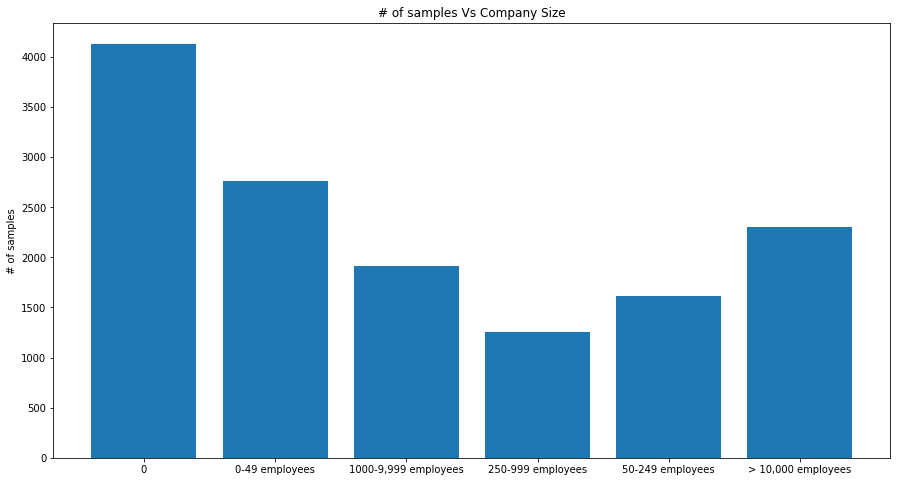

In [0]:
#Q6 for company size and Q10 for average yearly compensation.

#Checking if we have enough samples for each company
com_size = df["Q6"].values.tolist()
labels, counts = np.unique(com_size, return_counts = True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.title('# of samples Vs Company Size')
plt.show()

In [0]:
#Again replacing nans with zeros
#Because we have a lot of entries from students and they are not employed

df["Q10"] = df["Q10"].fillna(0)
salary = df["Q10"].values.tolist()
labels = np.unique(salary)
print(labels)

['$0-999' '0' '1,000-1,999' '10,000-14,999' '100,000-124,999'
 '125,000-149,999' '15,000-19,999' '150,000-199,999' '2,000-2,999'
 '20,000-24,999' '200,000-249,999' '25,000-29,999' '250,000-299,999'
 '3,000-3,999' '30,000-39,999' '300,000-500,000' '4,000-4,999'
 '40,000-49,999' '5,000-7,499' '50,000-59,999' '60,000-69,999'
 '7,500-9,999' '70,000-79,999' '80,000-89,999' '90,000-99,999'
 '> $500,000']


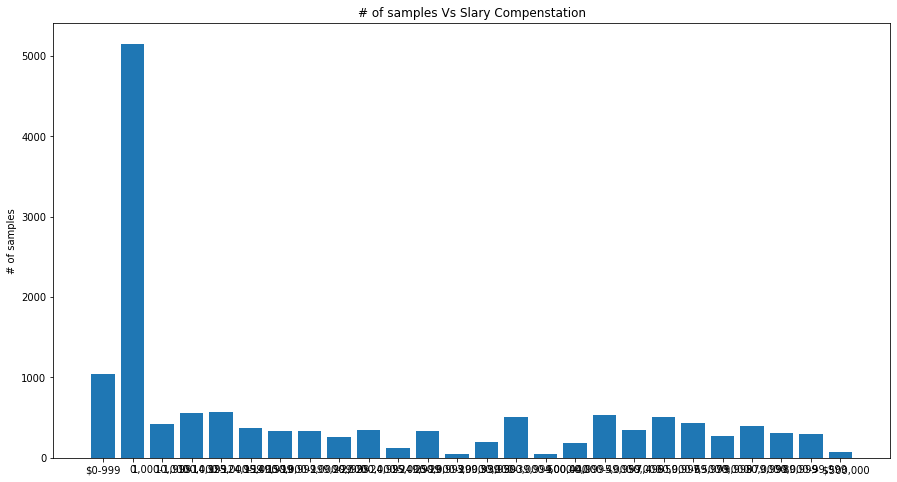

In [0]:
salary = df["Q10"].values.tolist()
labels, counts = np.unique(salary, return_counts = True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.title('# of samples Vs Slary Compenstation')
plt.show()

<h2> Creating target labels </h2>

Making seperate classifiers for salary and company size.

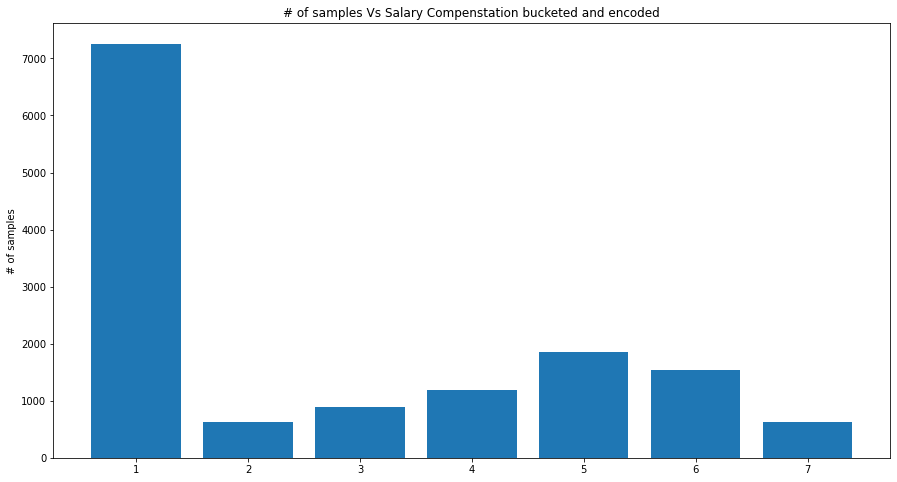

In [0]:
#Grouping salary buckets
# 0: 1, 1 : 0-5k, 2: 5k-10k, 3: 10k-20k, 4: 20k-40k, 5: 40k-80k, 6: 80k-150k, 7: 150k+
salary_encoding = {'0': 1,\
                   '$0-999': 1, '1,000-1,999': 1, '2,000-2,999':1, '3,000-3,999': 1, '4,000-4,999':1,\
                   '5,000-7,499': 2, '7,500-9,999':2,\
                   '10,000-14,999':3, '15,000-19,999': 3,\
                   '20,000-24,999': 4, '25,000-29,999': 4, '30,000-39,999': 4,\
                   '40,000-49,999': 5, '50,000-59,999': 5, '60,000-69,999': 5, '70,000-79,999': 5,\
                   '80,000-89,999': 6, '90,000-99,999': 6, '100,000-124,999': 6, '125,000-149,999': 6,\
                   '150,000-199,999': 7, '200,000-249,999': 7,  '250,000-299,999': 7,\
                   '300,000-500,000': 7, '> $500,000': 7}

#Seeing the bucketed distribution
salary_bucket = []
salaries = df["Q10"].values.tolist()
for salary in salaries:
  salary_bucket.append(salary_encoding[str(salary)])

labels, counts = np.unique(salary_bucket, return_counts = True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.title('# of samples Vs Salary Compenstation bucketed and encoded')
plt.show()

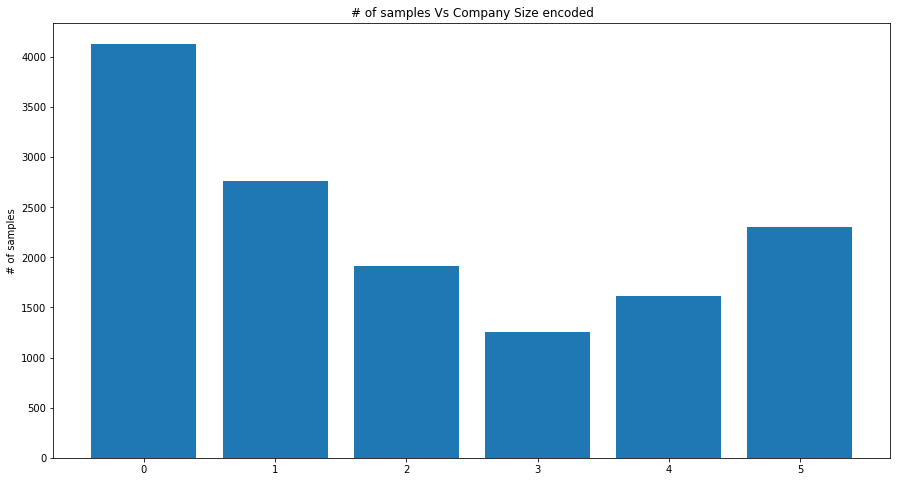

In [0]:
#Enocding company size (No bucketing just encoding)
com_size_encoding = {'0': 0, '0-49 employees': 1, '1000-9,999 employees': 2,\
                     '250-999 employees': 3, '50-249 employees': 4, '> 10,000 employees': 5}

#Encoding the company size
com_size = []
sizes = df["Q6"].values.tolist()
for size in sizes:
  com_size.append(com_size_encoding[str(size)])

labels, counts = np.unique(com_size, return_counts = True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.title('# of samples Vs Company Size encoded')
plt.show()

In [0]:
#Making a list a features
List_of_features = ["Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5",\
                   "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", "Q18_Part_9", "Q18_Part_10", "Q18_Part_11",\
                   "Q20_Part_1", "Q20_Part_2", "Q20_Part_3", "Q20_Part_4", "Q20_Part_5", "Q20_Part_6", \
                   "Q20_Part_7", "Q20_Part_8", "Q20_Part_9", "Q20_Part_10", "Q20_Part_11", \
                   "Q28_Part_1", "Q28_Part_2", "Q28_Part_3", "Q28_Part_4", "Q28_Part_5", "Q28_Part_6",\
                   "Q28_Part_7", "Q28_Part_8", "Q28_Part_9", "Q28_Part_10", "Q28_Part_11",\
                   "Q24_Part_1", "Q24_Part_2", "Q24_Part_3", "Q24_Part_4", "Q24_Part_5", "Q24_Part_6",\
                   "Q24_Part_7", "Q24_Part_8", "Q24_Part_9", "Q24_Part_10", "Q24_Part_11",\
                   "Q25_Part_1", "Q25_Part_2", "Q25_Part_3", "Q25_Part_4", "Q25_Part_5", "Q25_Part_6",\
                   "Q25_Part_7", "Q4"]

new_col_names = ["Python", "R", "SQL", "C", "C++", \
                 "Java", "Javascript", "TypeScript", "Bash", "MATLAB", "No common Programming",\
                 "ggplot", "Matplotlib", "Altair", "Shiny", "D3.js", "Plotly",\
                 "Bokeh", "Seaborn", "Geoplotlib", "Leaflet/Folium", "No common visualization",\
                 "Scikit-learn", "Tensorflow", "Keras", "Random Forest", "Xgboost",\
                 "Pytorch", "Carcet", "LightGBM", "Spark MLib", "Fast.ai", "No common toolkit",\
                 "Linear Models", "Decision Trees and Random Forest", "Gradient Boositng Machines", "Bayesian Approaches", "Evolutionary Approaches", "Dense NNs",\
                 "CNN", "Generative Adversarial Networks", "RNN", "Transoformed Network", "No common algorithm",\
                 "Automated Data Augmentation", "Automated Feature Engineering", "Automated Model Selection",\
                 "Automated Model Architecture Searches", "Automated Hypreparameter Tuning", "Automated Full ML Pipelines",\
                 "No common ML Tools", "Education Level"]

In [0]:
#Making an empty dataframe
X = pd.DataFrame()
for j in range(len(List_of_features)):
  feature = List_of_features[j]
  feature_name = new_col_names[j]
  df[feature] = df[feature].fillna(0)
  list_f = df[feature].values.tolist()
  for i in range(len(list_f)):
    if (list_f[i] != 0):
      list_f[i] = 1
  X[feature_name] = list_f

In [0]:
print(X.shape)
X.head()

(13990, 52)


,Python,R,SQL,C,C++,Java,Javascript,TypeScript,Bash,MATLAB,No common Programming,ggplot,Matplotlib,Altair,Shiny,D3.js,Plotly,Bokeh,Seaborn,Geoplotlib,Leaflet/Folium,No common visualization,Scikit-learn,Tensorflow,Keras,Random Forest,Xgboost,Pytorch,Carcet,LightGBM,Spark MLib,Fast.ai,No common toolkit,Linear Models,Decision Trees and Random Forest,Gradient Boositng Machines,Bayesian Approaches,Evolutionary Approaches,Dense NNs,CNN,Generative Adversarial Networks,RNN,Transoformed Network,No common algorithm,Automated Data Augmentation,Automated Feature Engineering,Automated Model Selection,Automated Model Architecture Searches,Automated Hypreparameter Tuning,Automated Full ML Pipelines,No common ML Tools,Education Level
0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1
3,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


length of the data-frame 53


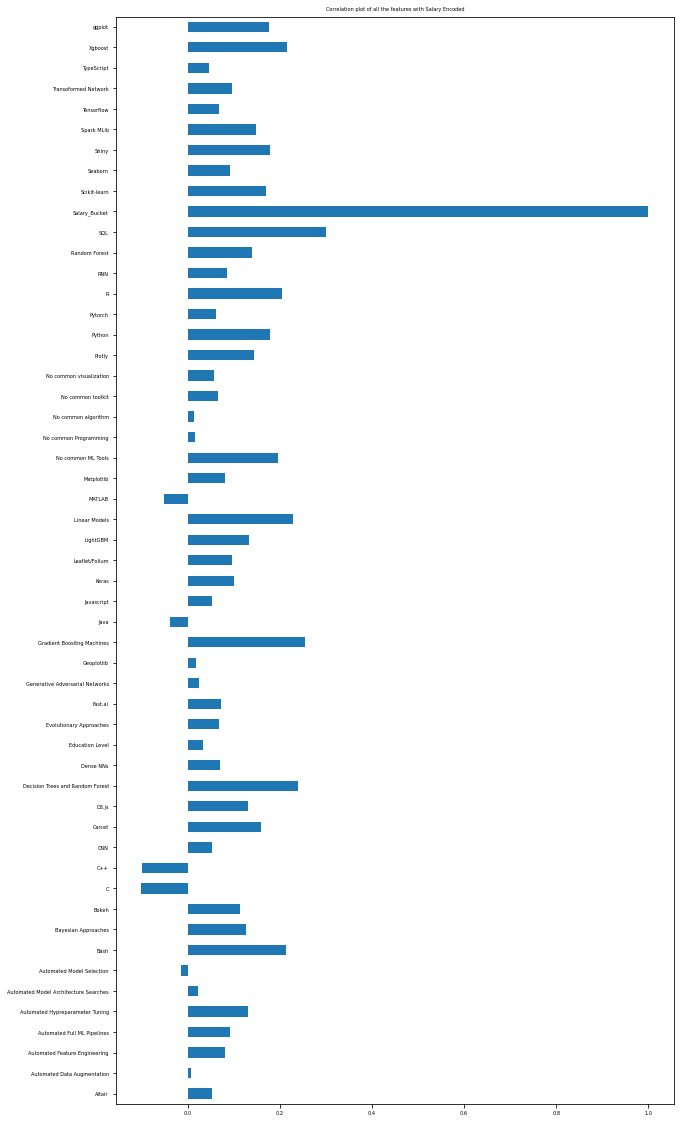

In [0]:
X ['Salary_Bucket'] = salary_bucket

print('length of the data-frame', (len(list(X))))
plt.rc('axes', titlesize=5)
plt.rc('font', size=5)
corr = X.corr()
plt.title('Correlation plot of all the features with Salary Encoded')
corr.Salary_Bucket.sort_index().plot(kind="barh",figsize=(10,20))

Text(0, 0.5, 'Absolute correlation with YearlyCompensation')

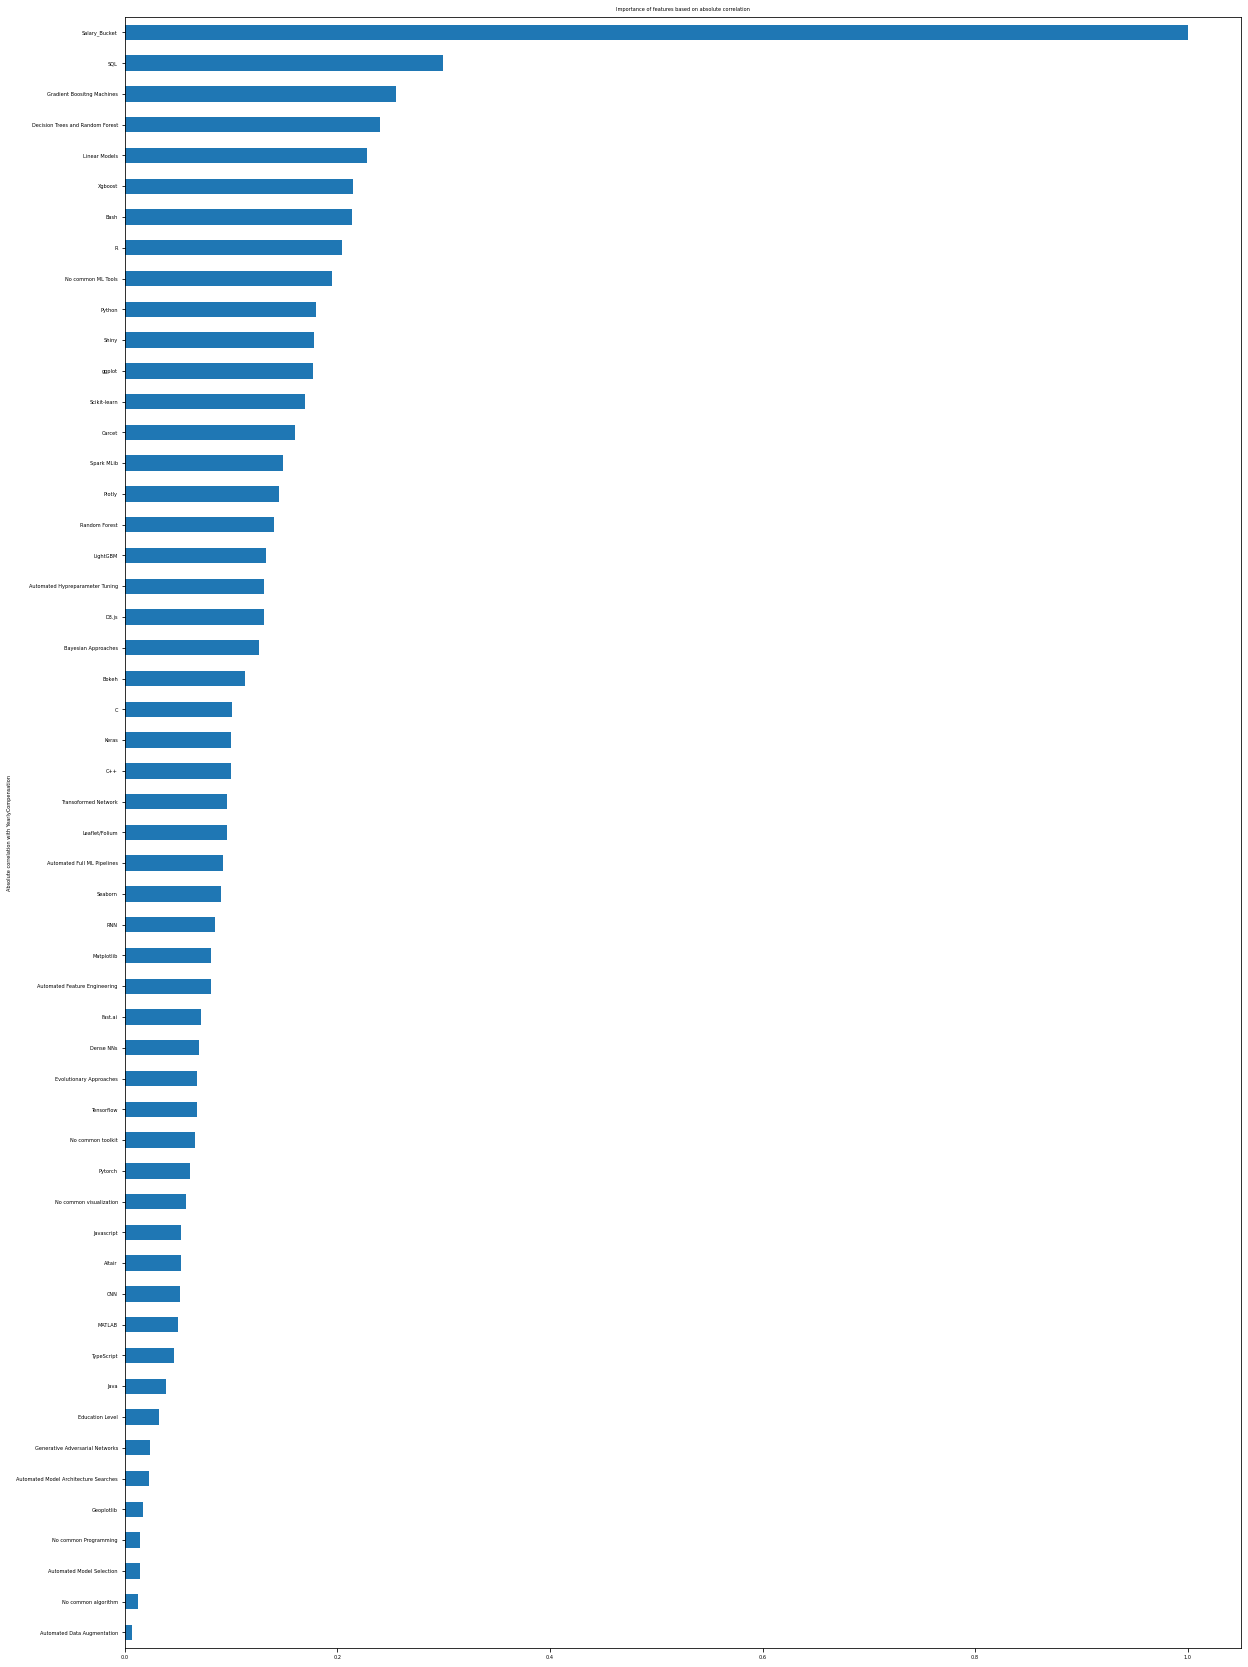

In [0]:
correlation = corr.Salary_Bucket.apply(lambda x: abs(x)).sort_values()
ax = (correlation.plot(kind="barh",figsize=(20,30),title="Importance of features based on absolute correlation"))
ax.set_ylabel('Absolute correlation with YearlyCompensation')

In [0]:
#Dropping the salary buckets from data frame
X = X.drop(['Salary_Bucket'], axis = 1)

From the correlation it can be seen that SQL, Linear Models, Decision Trees, Gradient Boosting Machine, R etc. are strongly correlated to slary buckets,

<h2> Data science topics vs Salary bucket</h2>

In [0]:
y = np.asarray(salary_bucket)
X_ar = np.asarray(X)

from sklearn.model_selection import train_test_split, KFold
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_ar, y, test_size = 0.3, shuffle =True)
#Making a validation set for fitting a Neural Network model
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.3, shuffle =True)

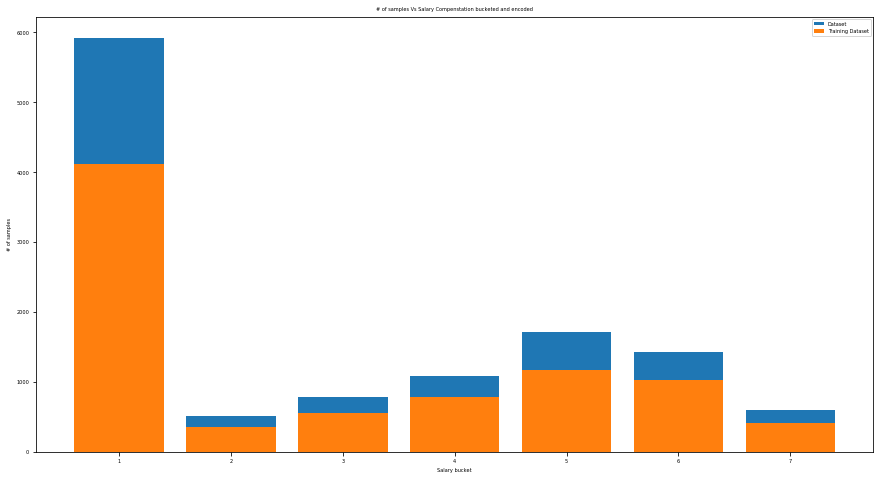

In [0]:
#Seeing the bucketed distribution

labels, counts = np.unique(y, return_counts = True)
labels, counts_t = np.unique(y_train, return_counts = True)

ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center', label = 'Dataset')
plt.bar(ticks, counts_t, align='center', label = 'Training Dataset')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.xlabel('Salary bucket')
plt.title('# of samples Vs Salary Compenstation bucketed and encoded')
plt.legend()
plt.show()

Trying a Random-forest algorithm.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [0]:
#Fitting a model
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=10)
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)
pred_proba = rf.predict_proba(X_train)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 59.89421056445185%.


Performing hyper parameter tuning using grid search.

In [0]:
ACC_score_gini_md15 = []
ACC_score_entropy_md15 = []

for max_depth in [5, 10, 15, 20]:
    for criterion in ['gini', 'entropy']:
      for n in [10, 20, 50, 100, 200]:
        rf = RandomForestClassifier(n_estimators = n, criterion=criterion, max_depth = max_depth, bootstrap=True, oob_score =True)
        rf = rf.fit(X_train, y_train)
        if criterion == 'gini' and max_depth == 15:
          ACC_score_gini_md15.append(rf.oob_score_)
        elif criterion == 'entropy' and max_depth == 15:
          ACC_score_entropy_md15.append(rf.oob_score_)
        print('For selection criterion {} and number of estimators {} with max_depht {}, the OOB score is {}'.format(criterion, n, max_depth, np.round(rf.oob_score_, 3)))
      print('\n')
    print('\n')

For selection criterion gini and number of estimators 10 with max_depht 5, the OOB score is 0.402
For selection criterion gini and number of estimators 20 with max_depht 5, the OOB score is 0.407
For selection criterion gini and number of estimators 50 with max_depht 5, the OOB score is 0.411
For selection criterion gini and number of estimators 100 with max_depht 5, the OOB score is 0.41
For selection criterion gini and number of estimators 200 with max_depht 5, the OOB score is 0.41


For selection criterion entropy and number of estimators 10 with max_depht 5, the OOB score is 0.404
For selection criterion entropy and number of estimators 20 with max_depht 5, the OOB score is 0.407
For selection criterion entropy and number of estimators 50 with max_depht 5, the OOB score is 0.407
For selection criterion entropy and number of estimators 100 with max_depht 5, the OOB score is 0.408
For selection criterion entropy and number of estimators 200 with max_depht 5, the OOB score is 0.408



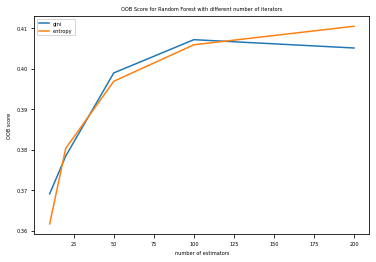

In [0]:
#plotting the oob scores
x = [10, 20, 50, 100, 200]
plt.plot(x, ACC_score_gini_md15, label = 'gini')
plt.plot(x, ACC_score_entropy_md15, label = 'entropy')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

Using the best set of parameters

(i.e. max_depth = 10, criterion = 'gini', n_estimators = 200)

In [0]:
rf = RandomForestClassifier(n_estimators = 200, criterion='gini', max_depth=10)
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)
pred_proba = rf.predict_proba(X_train)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 62.31591448931116%.


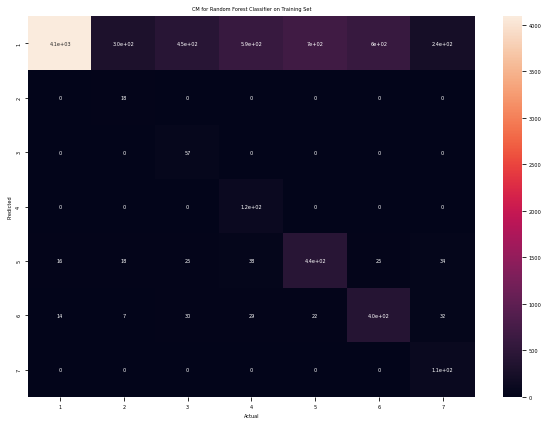

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(predictions, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Classifier on Training Set')
plt.show()

In [0]:
#Checking Performance of the model on validation set
predictions = rf.predict(X_val)
pred_proba = rf.predict_proba(X_val)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of the model is {}%.'.format(val_acc*100))

Validation Accuracy of the model is 52.612826603325416%.


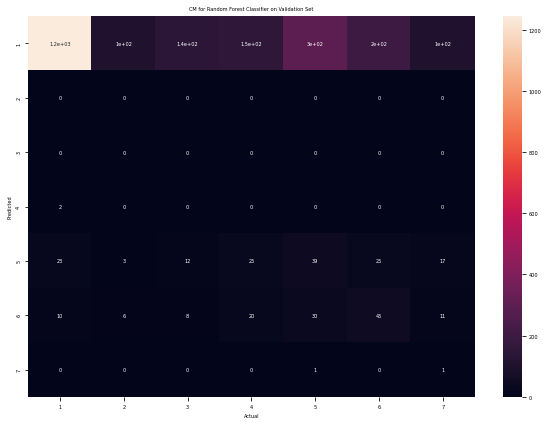

In [0]:
#Checking the models performance on the validation set
classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Classifier on Validation Set')
plt.show()

Decision Tree is predicting almost everything to be zero which is not a good thing.

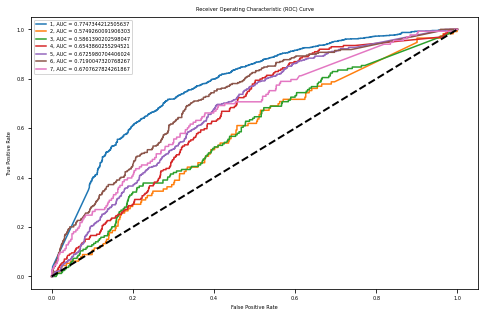

In [0]:
#Plotting ROC curve
targets = [1, 2, 3, 4, 5, 6, 7]
plt.figure(figsize = (8,5))
for i in range(pred_proba.shape[1]):
  b_y_val = []
  for target in y_val:
    if(target == targets[i]):
      b_y_val.append(1)
    else:
      b_y_val.append(0)
  fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, i])
  auc = roc_auc_score(b_y_val, pred_proba[:, i])
  label = str(targets[i])+', AUC = '+str(auc)
  plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

Since the data is ordinal and we are fitting a nominal model It was expected that we will have a low accuracy.

To account for the ordinal nature of the targets we will try to fit a Rnadom Forest Regressor Model to make sure that the ordinal nature of the targets is captured by the model.

In [0]:
from sklearn.ensemble import RandomForestRegressor
import math

In [0]:
#Fitting a model
rf = RandomForestRegressor(n_estimators = 10, criterion='mse')
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)

#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

#Checking the accuracy of the labels predictions
train_acc = ((pred_labels == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 53.3367147308166%.


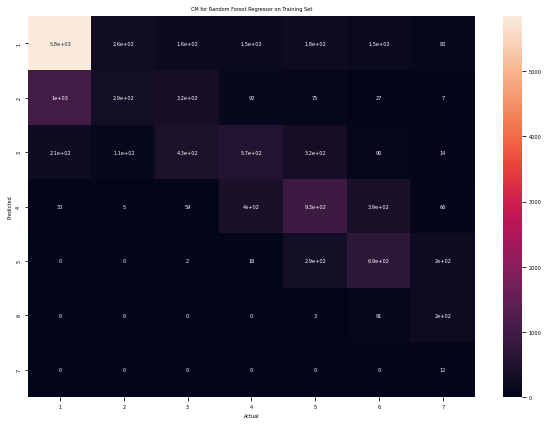

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(pred_labels, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Training Set')
plt.show()

Hyper parameter tuning using OOB score

In [0]:
ACC_score_mse = []
ACC_score_mae = []

for criterion in ['mse', 'mae']:
  for n in [20, 50, 100, 200, 500, 1000]:
    rf = RandomForestRegressor(n_estimators = n, criterion=criterion, bootstrap=True, oob_score =True)
    rf = rf.fit(X_train, y_train)
    if criterion == 'mse':
      ACC_score_mse.append(rf.oob_score_)
    elif criterion == 'mae':
      ACC_score_mae.append(rf.oob_score_)
    print('For selection criterion {} and number of estimators {}, the OOB score is {}'.format(criterion, n, np.round(rf.oob_score_, 3)))
  print('\n')

For selection criterion mse and number of estimators 20, the OOB score is 0.061
For selection criterion mse and number of estimators 50, the OOB score is 0.111
For selection criterion mse and number of estimators 100, the OOB score is 0.124
For selection criterion mse and number of estimators 200, the OOB score is 0.131
For selection criterion mse and number of estimators 500, the OOB score is 0.137
For selection criterion mse and number of estimators 1000, the OOB score is 0.138


For selection criterion mae and number of estimators 20, the OOB score is -0.03
For selection criterion mae and number of estimators 50, the OOB score is 0.023
For selection criterion mae and number of estimators 100, the OOB score is 0.036
For selection criterion mae and number of estimators 200, the OOB score is 0.05
For selection criterion mae and number of estimators 500, the OOB score is 0.052
For selection criterion mae and number of estimators 1000, the OOB score is 0.055




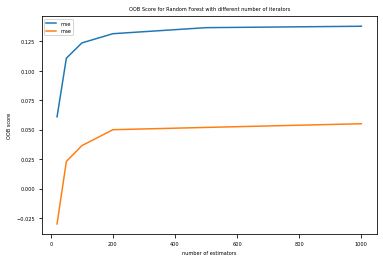

In [0]:
#plotting the oob scores
x = [20, 50, 100, 200, 500, 1000]
plt.plot(x, ACC_score_mse, label = 'mse')
plt.plot(x, ACC_score_mae, label = 'mae')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

Using the best set of parameters

(i.e. criterion = 'mse', n_estimators = 500)

In [0]:
#Fitting a model
rf = RandomForestRegressor(n_estimators = 500, criterion='mse')
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)
#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(round(pred))

#Checking the accuracy of the labels predictions
train_acc = ((pred_labels == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 39.69121140142518%.


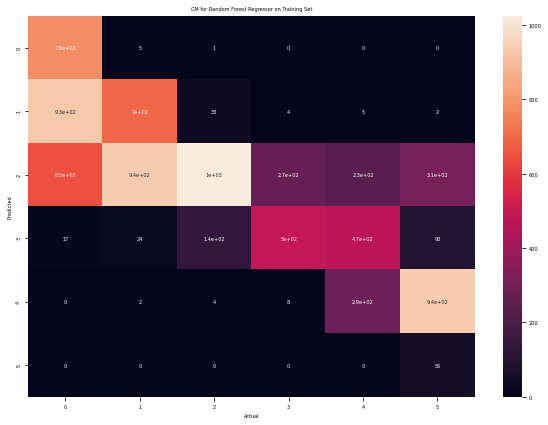

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(pred_labels, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Training Set')
plt.show()

In [0]:
#Checking Performance of the model on validation set
predictions = rf.predict(X_val)
#pred_proba = rf.predict_proba(X_val)
#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

val_acc = ((pred_labels == y_val).sum())/len(predictions)
print('Validation Accuracy of the model is {}%.'.format(val_acc*100))

Validation Accuracy of the model is 23.832145684877275%.


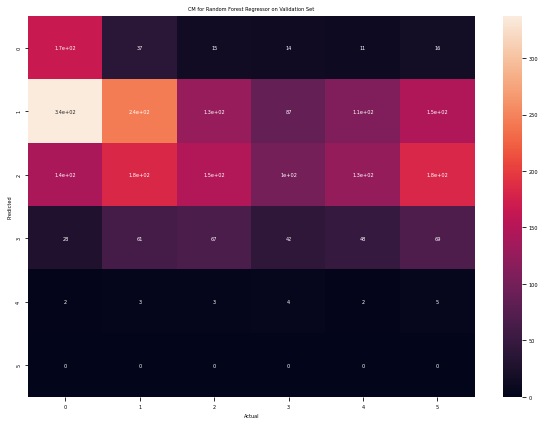

In [0]:
#Checking the models performance on the validation set
classes = np.unique(y_val)
cm = confusion_matrix(pred_labels, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Validation Set')
plt.show()

In [0]:
#Checking performance on test set
predictions = rf.predict(X_test)
#pred_proba = rf.predict_proba(X_val)
#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

test_acc = ((pred_labels == y_test).sum())/len(predictions)
print('Test Accuracy of the model is {}%.'.format(test_acc*100))

Test Accuracy of the model is 22.62234533702678%.


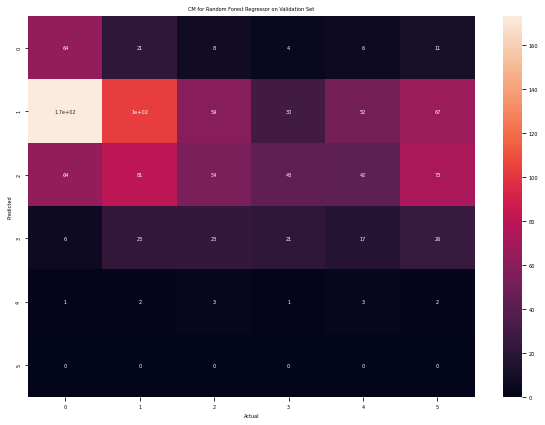

In [0]:
#Checking the models performance on the validation set
classes = np.unique(y_test)
cm = confusion_matrix(pred_labels, y_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Validation Set')
plt.show()

Even though the accuracy of the model is less, the confusion matrix does show that actually high salry bucktes are predicted to bw high salary in most of the cases. 

Since the dataset had a lot of nan salary inputs it is possible that some of the nan inputs belonged to higher salary bucket but since the input field was nan we clubbed it in salary bucket 1.

In [0]:
#Now checking the weights of all the features
salary_wt_skill = { }
wts = []
for i in range(len(List_of_features)):
  x_in = np.zeros(len(List_of_features))
  x_in[i] = 1
  x_in = x_in.reshape(1, len(new_col_names))
  salary_wt_skill[rf.predict(x_in)[0]] = new_col_names[i]
  wts.append(rf.predict(x_in)[0])
  print("Weight of skill {} is {}".format(new_col_names[i], round(rf.predict(x_in)[0], 3)))

Weight of skill Python is 1.024
Weight of skill R is 2.339
Weight of skill SQL is 2.339
Weight of skill C is 0.617
Weight of skill C++ is 2.197
Weight of skill Java is 1.431
Weight of skill Javascript is 1.799
Weight of skill TypeScript is 2.097
Weight of skill Bash is 1.982
Weight of skill MATLAB is 1.916
Weight of skill No common Programming is 1.975
Weight of skill ggplot is 1.488
Weight of skill Matplotlib is 1.316
Weight of skill Altair is 2.185
Weight of skill Shiny is 1.99
Weight of skill D3.js is 2.078
Weight of skill Plotly is 2.794
Weight of skill Bokeh is 2.255
Weight of skill Seaborn is 2.267
Weight of skill Geoplotlib is 2.009
Weight of skill Leaflet/Folium is 1.706
Weight of skill No common visualization is 1.581
Weight of skill Scikit-learn is 2.012
Weight of skill Tensorflow is 1.709
Weight of skill Keras is 2.089
Weight of skill Random Forest is 3.51
Weight of skill Xgboost is 2.175
Weight of skill Pytorch is 1.811
Weight of skill Carcet is 2.422
Weight of skill LightG

In [0]:
wts.sort(reverse = True)
for wt in wts:
  print("Skill {}, has weight {}".format(salary_wt_skill[wt], wt))

Skill Random Forest, has weight 3.5098910760020843
Skill Plotly, has weight 2.7935664856107043
Skill Automated Hypreparameter Tuning, has weight 2.596666802204435
Skill Automated Data Augmentation, has weight 2.5463651469560915
Skill No common algorithm, has weight 2.438757197491289
Skill Carcet, has weight 2.4219689612695072
Skill Fast.ai, has weight 2.4154455755758
Skill SQL, has weight 2.338983946608947
Skill R, has weight 2.3387019327973957
Skill Seaborn, has weight 2.2666045236250496
Skill Decision Trees and Random Forest, has weight 2.264529718731173
Skill Bokeh, has weight 2.255319061440895
Skill CNN, has weight 2.2388050730355107
Skill Automated Feature Engineering, has weight 2.2167580402684814
Skill C++, has weight 2.19679968585998
Skill RNN, has weight 2.1915214145639608
Skill Automated Full ML Pipelines, has weight 2.1887436396220004
Skill Altair, has weight 2.18483429830873
Skill Xgboost, has weight 2.174674984739059
Skill Dense NNs, has weight 2.1595202668002917
Skill Aut

No common field of any thing means that the user didn't use of any of the options proivded to pick from for that particular question but then he/she might have used others to enter other techniques not there in the list which we have not encoded.

In [0]:
#Since we only want to select common and import skills for a data-scientist
#Only considering skills with over a 2000 sample points
#Skills in order of deacreasing weights with skills other than no common skills
no_common = ["No common Programming", "No common ML Tools", "No common algorithm", "No common toolkit", "No common visualization", "Education Level"]
w_with_skills = []
wts.sort(reverse = True)
for wt in wts:
  if len(X[X[salary_wt_skill[wt]] == 1]) > 2000 and salary_wt_skill[wt] not in no_common:
    #print(len(X[X[salary_wt_skill[wt]] == 1]))
    print("Skill {}, has weight {}".format(salary_wt_skill[wt], round(wt, 3)))
    w_with_skills.append([salary_wt_skill[wt], round(wt, 3)])


print('\n')
#for Not 0-1 encoding
no_01 = ["Education Level"]
for wt in wts:
  if salary_wt_skill[wt] in no_01:
    #print(len(X[X[salary_wt_skill[wt]] == 1]))
    print("{}, has weight {}".format(salary_wt_skill[wt], round(wt, 3)))
    w_with_skills.append([salary_wt_skill[wt], round(wt, 3)])

Skill Random Forest, has weight 3.51
Skill Plotly, has weight 2.794
Skill SQL, has weight 2.339
Skill R, has weight 2.339
Skill Seaborn, has weight 2.267
Skill Decision Trees and Random Forest, has weight 2.265
Skill CNN, has weight 2.239
Skill RNN, has weight 2.192
Skill Xgboost, has weight 2.175
Skill Dense NNs, has weight 2.16
Skill Keras, has weight 2.089
Skill Linear Models, has weight 2.03
Skill Gradient Boositng Machines, has weight 2.017
Skill Scikit-learn, has weight 2.012
Skill Bayesian Approaches, has weight 1.994
Skill Automated Model Selection, has weight 1.832
Skill Pytorch, has weight 1.811
Skill Tensorflow, has weight 1.709
Skill ggplot, has weight 1.488
Skill Matplotlib, has weight 1.316
Skill Python, has weight 1.024


Education Level, has weight 1.908


In [0]:
#Another way of obtaining the same thing
skills_importance = {}
imp = []
skills_importance_list = []
for x,y in zip(rf.feature_importances_, new_col_names):
  skills_importance[x] = y
  imp.append(x)
#printing in the correct order
imp.sort(reverse = True)
for importance in imp:
  if (skills_importance[importance] not in no_common) and (len(X[X[skills_importance[importance]] == 1]) > 2000):
    print('{}: {}'.format(skills_importance[importance], round(importance*100, 3))) 
    #Scaling it just to make the importance easier to compare
    skills_importance_list.append([skills_importance[importance], round(importance*100, 3)])

print('\n')
for importance in imp:
  if skills_importance[importance] in no_01:
    print('{}: {}'.format(skills_importance[importance], round(importance*100, 3))) 
    #Scaling it just to make the importance easier to compare
    skills_importance_list.append([skills_importance[importance], round(importance*100, 3)])


SQL: 5.031
Seaborn: 3.176
Bayesian Approaches: 3.057
R: 3.019
Plotly: 3.007
Decision Trees and Random Forest: 2.906
ggplot: 2.723
CNN: 2.715
Linear Models: 2.677
Keras: 2.66
Tensorflow: 2.649
Random Forest: 2.582
Gradient Boositng Machines: 2.564
Matplotlib: 2.551
Scikit-learn: 2.435
Dense NNs: 2.39
Pytorch: 2.355
RNN: 2.178
Xgboost: 2.053
Automated Model Selection: 1.84
Python: 1.514


Education Level: 0.444


In [0]:
weights_skills_v_salary = pd.DataFrame(w_with_skills,columns=['Skill','Weight'])
weights_skills_v_salary.to_csv(r'Salary_Skills_weight.csv', index = False)
importance_skills_v_salary = pd.DataFrame(skills_importance_list,columns=['Skill','Importance'])
importance_skills_v_salary.to_csv(r'Salary_Skills_importance.csv', index = False)

Since accuracies of Random Forest Models have been quite low we went ahead and have implemted a NN to classify the salary bucket using ML skills.

In [0]:
#Making y array like
def y_array(y):
  b_ar_y = np.zeros((len(y), len(np.unique(y))))
  for i in range(len(y)):
    for j in range(y[i]):
      b_ar_y[i, j] = 1
  #  b_ar_y[i, (y[i]-1)] = 1
  return b_ar_y #Using ordinal like encoding, like [1 1 0 0 0 0 0] for class 1

In [0]:
y_train_v = y_array(y_train)
y_val_v = y_array(y_val)

In [0]:
print(y_train_v)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [0]:
import tensorflow as tf

from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras import Sequential

In [0]:
#Defining the model 
drop_out_rate = 0.1
#Layer-1
model = Sequential()
model.add(Dense(14, activation='relu', input_shape = (len(new_col_names),)))

#Layer-2
model.add(Dense(10, activation='relu'))

#Final Layer
model.add(Dense(len(np.unique(salary_bucket)), activation='softmax', kernel_initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 1), bias_initializer = tf.keras.initializers.Zeros()))

#compiling the model
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer= tf.keras.optimizers.Adam(), metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                742       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


Keeping the number of parameters as low as possible just to ensure that the data avialable is enough to actually train the model.

In [0]:
def learning_rate_scheduler(epoch):
    return 1e-3*(0.5**(epoch // 5))
checkpoints =  tf.keras.callbacks.ModelCheckpoint("NN_classifier.hdf5",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max')
redued_learning_rate_cb = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
cb_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)

In [0]:
#Converting the dataset to tensors
X_train_v = X_train.reshape(len(X_train), len(new_col_names))
X_val_v = X_val.reshape(len(X_val), len(new_col_names))
X_test_v = X_test.reshape(len(X_test), len(new_col_names))

In [0]:
history = model.fit(X_train_v, y_train_v, epochs = 20, batch_size = 256, validation_data = (X_val_v, y_val_v), callbacks = [checkpoints, redued_learning_rate_cb, cb_tensorboard], verbose = 0)


Epoch 00001: val_accuracy improved from -inf to 0.32700, saving model to NN_classifier.hdf5

Epoch 00002: val_accuracy improved from 0.32700 to 0.76960, saving model to NN_classifier.hdf5

Epoch 00003: val_accuracy improved from 0.76960 to 0.99921, saving model to NN_classifier.hdf5

Epoch 00004: val_accuracy did not improve from 0.99921

Epoch 00005: val_accuracy did not improve from 0.99921

Epoch 00006: val_accuracy did not improve from 0.99921

Epoch 00007: val_accuracy did not improve from 0.99921

Epoch 00008: val_accuracy did not improve from 0.99921

Epoch 00009: val_accuracy did not improve from 0.99921

Epoch 00010: val_accuracy did not improve from 0.99921

Epoch 00011: val_accuracy did not improve from 0.99921

Epoch 00012: val_accuracy did not improve from 0.99921

Epoch 00013: val_accuracy did not improve from 0.99921

Epoch 00014: val_accuracy did not improve from 0.99921

Epoch 00015: val_accuracy did not improve from 0.99921

Epoch 00016: val_accuracy did not improve 

In [0]:
def plot_fitting(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

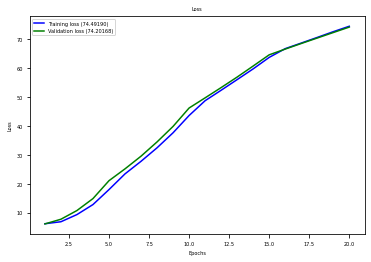

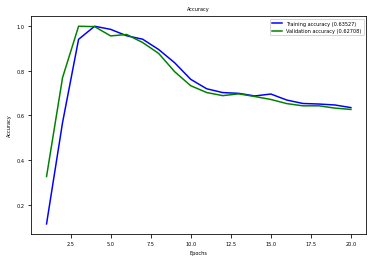

In [0]:
plot_fitting(history)

In [0]:
y_pred = model.predict(X_test_v, batch_size=128, verbose=1)

9/9 [==============================] - 0s 2ms/step


In [0]:
y_pred_labels = []
for pred_p in y_pred:
  label = np.argmax(pred_p)+1
  y_pred_labels.append(label)

test_acc = ((y_pred_labels == y_test).sum())/len(predictions)
print('Testing Accuracy of the model is {}%.'.format(test_acc*100))

Testing Accuracy of the model is 36.38042474607572%.


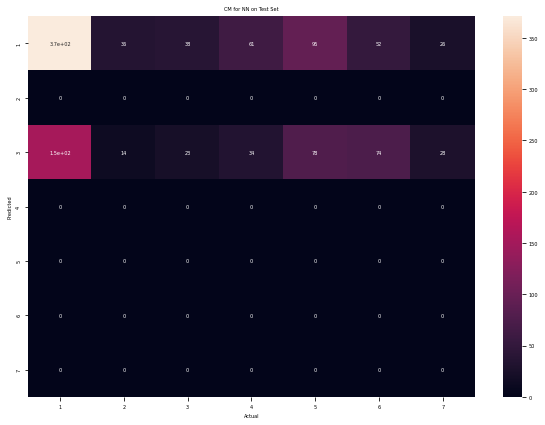

In [0]:
#Confusion Matrix
#Checking the models performance on the test set
classes = np.unique(y_test)
cm = confusion_matrix(y_pred_labels, y_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for NN on Test Set')
plt.show()

In [0]:
#Clearing the session to remove old model from memory 
tf.keras.backend.clear_session()

This is happening beause of the class imbalance and we can provide the model class weights so that it adjusts the loss function accordingly.

In [0]:
y = salary_bucket
from sklearn.utils.class_weight import compute_class_weight
def get_class_weight(y):
    """

    Used from: https://stackoverflow.com/a/50695814
    TODO: check validity and 'balanced' option
    :param y: A list of one-hot-encoding labels [[0,0,1,0],[0,0,0,1],..]
    :return: class-weights to be used by keras model.fit(.. class_weight="") -> {0:0.52134, 1:1.adas..}
    """
    y_integers = np.argmax(y, axis=1)
    class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
    d_class_weights = dict(enumerate(class_weights))
    return d_class_weights
class_weights = get_class_weight(y_array(y))

In [0]:
checkpoints_cw =  tf.keras.callbacks.ModelCheckpoint("NN_classifier.hdf5",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max')

In [0]:
#Defining the model 
#Layer-1
model_cw = Sequential()
model_cw.add(Dense(14, activation='relu', input_shape = (len(new_col_names),)))

#Layer-2
model_cw.add(Dense(10, activation='relu'))

#Final Layer
model_cw.add(Dense(len(np.unique(y)), activation='softmax', kernel_initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 1), bias_initializer = tf.keras.initializers.Zeros()))

#compiling the model
model_cw.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer= tf.keras.optimizers.Adam(), metrics = ['accuracy'])

model_cw.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                742       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_cw.fit(X_train_v, y_train_v, epochs = 20, batch_size = 256, validation_data = (X_val_v, y_val_v), callbacks = [checkpoints_cw, redued_learning_rate_cb, cb_tensorboard], class_weight = class_weights, verbose = 0)


Epoch 00001: val_accuracy improved from -inf to 0.41539, saving model to NN_classifier.hdf5

Epoch 00002: val_accuracy did not improve from 0.41539

Epoch 00003: val_accuracy did not improve from 0.41539

Epoch 00004: val_accuracy improved from 0.41539 to 0.45046, saving model to NN_classifier.hdf5

Epoch 00005: val_accuracy improved from 0.45046 to 0.55226, saving model to NN_classifier.hdf5

Epoch 00006: val_accuracy improved from 0.55226 to 0.63432, saving model to NN_classifier.hdf5

Epoch 00007: val_accuracy improved from 0.63432 to 0.65100, saving model to NN_classifier.hdf5

Epoch 00008: val_accuracy improved from 0.65100 to 0.67041, saving model to NN_classifier.hdf5

Epoch 00009: val_accuracy did not improve from 0.67041

Epoch 00010: val_accuracy improved from 0.67041 to 0.69731, saving model to NN_classifier.hdf5

Epoch 00011: val_accuracy improved from 0.69731 to 0.70003, saving model to NN_classifier.hdf5

Epoch 00012: val_accuracy improved from 0.70003 to 0.70650, saving

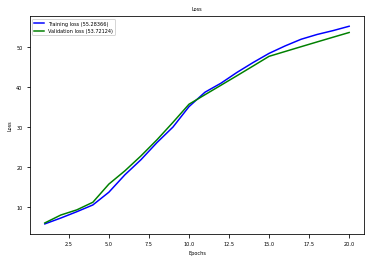

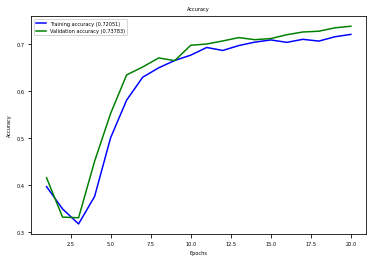

In [0]:
plot_fitting(history)

In [0]:
y_pred = model_cw.predict(X_test_v, batch_size=128, verbose=1)

10/10 [==============================] - 0s 1ms/step


In [0]:
y_pred_labels = []
for pred_p in y_pred:
  label = np.argmax(pred_p)+1
  y_pred_labels.append(label)

test_acc = ((y_pred_labels == y_test).sum())/len(y_test)
print('Testing Accuracy of the model is {}%.'.format(test_acc*100))

Testing Accuracy of the model is 44.920634920634924%.


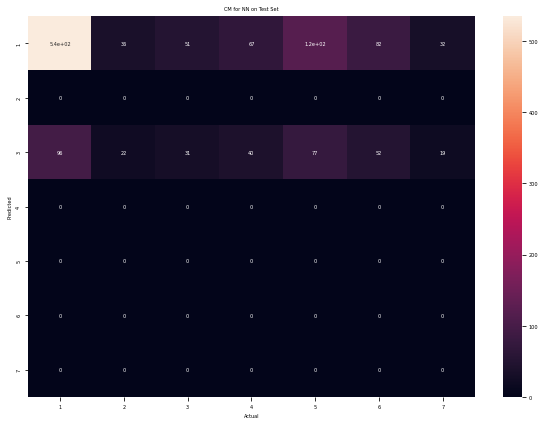

In [0]:
#Confusion Matrix
#Checking the models performance on the test set
classes = np.unique(y_test)
cm = confusion_matrix(y_pred_labels, y_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for NN on Test Set')
plt.show()

Since the NN has even worse performance than Rnadom Forest Regressor we use Random Forest Regressor to decide weights and importance of features. 

Possible reasons for poor performace , We don't have enough samples to add more layers to NN and the dataset is imbalanced which is one of the main reasons as to why NN is not able to attain a decent accuracy.

<h2>Data science topics vs Company Size</h2>

As idealy one will want a job in a big company and would like to learn essential skills for getting a job in big companies.

In [0]:
y = np.asarray(com_size)
X_ar = np.asarray(X)

from sklearn.model_selection import train_test_split, KFold
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_ar, y, test_size = 0.3, shuffle =True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.3, shuffle =True)

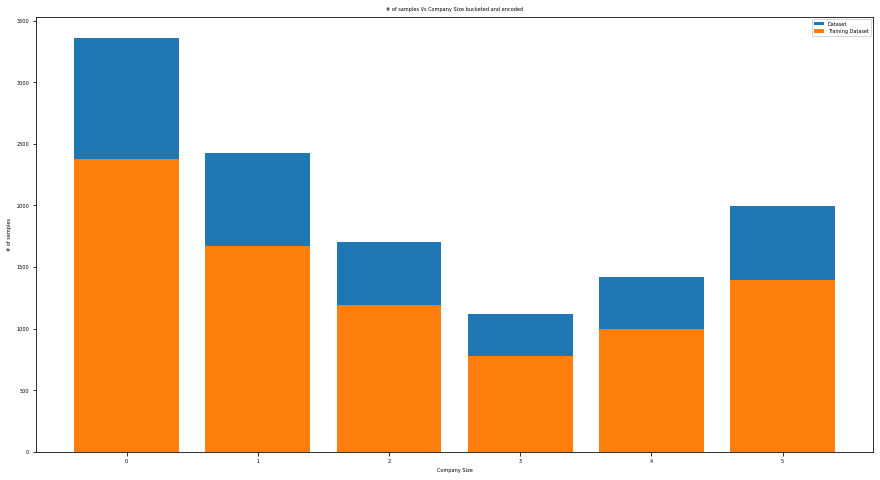

In [0]:
#Seeing the bucketed distribution

labels, counts = np.unique(y, return_counts = True)
labels, counts_t = np.unique(y_train, return_counts = True)

ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center', label = 'Dataset')
plt.bar(ticks, counts_t, align='center', label = 'Training Dataset')
plt.xticks(ticks, labels)
plt.ylabel('# of samples')
plt.xlabel('Company Size')
plt.title('# of samples Vs Company Size bucketed and encoded')
plt.legend()
plt.show()

Trying a Random-forest algorithm.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [0]:
#Fitting a model
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=10)
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)
pred_proba = rf.predict_proba(X_train)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 48.43127309615245%.


Performing hyper parameter tuning using grid search.

In [0]:
ACC_score_gini_md15 = []
ACC_score_entropy_md15 = []

for max_depth in [5, 10, 15, 20]:
    for criterion in ['gini', 'entropy']:
      for n in [10, 20, 50, 100, 200]:
        rf = RandomForestClassifier(n_estimators = n, criterion=criterion, max_depth = max_depth, bootstrap=True, oob_score =True)
        rf = rf.fit(X_train, y_train)
        if criterion == 'gini' and max_depth == 15:
          ACC_score_gini_md15.append(rf.oob_score_)
        elif criterion == 'entropy' and max_depth == 15:
          ACC_score_entropy_md15.append(rf.oob_score_)
        print('For selection criterion {} and number of estimators {} with max_depht {}, the OOB score is {}'.format(criterion, n, max_depth, np.round(rf.oob_score_, 3)))
      print('\n')
    print('\n')

For selection criterion gini and number of estimators 10 with max_depht 5, the OOB score is 0.316
For selection criterion gini and number of estimators 20 with max_depht 5, the OOB score is 0.323
For selection criterion gini and number of estimators 50 with max_depht 5, the OOB score is 0.327
For selection criterion gini and number of estimators 100 with max_depht 5, the OOB score is 0.325
For selection criterion gini and number of estimators 200 with max_depht 5, the OOB score is 0.326


For selection criterion entropy and number of estimators 10 with max_depht 5, the OOB score is 0.324
For selection criterion entropy and number of estimators 20 with max_depht 5, the OOB score is 0.319
For selection criterion entropy and number of estimators 50 with max_depht 5, the OOB score is 0.327
For selection criterion entropy and number of estimators 100 with max_depht 5, the OOB score is 0.324
For selection criterion entropy and number of estimators 200 with max_depht 5, the OOB score is 0.326

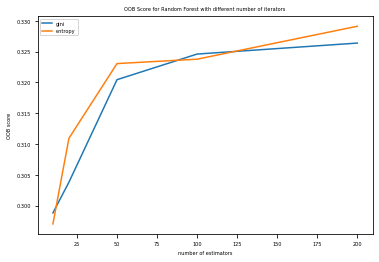

In [0]:
#plotting the oob scores
x = [10, 20, 50, 100, 200]
plt.plot(x, ACC_score_gini_md15, label = 'gini')
plt.plot(x, ACC_score_entropy_md15, label = 'entropy')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

Using the best set of parameters

(i.e. max_depth = 10, criterion = 'entropy', n_estimators = 200)

In [0]:
rf = RandomForestClassifier(n_estimators = 200, criterion='entropy', max_depth=10)
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)
pred_proba = rf.predict_proba(X_train)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 54.204275534441805%.


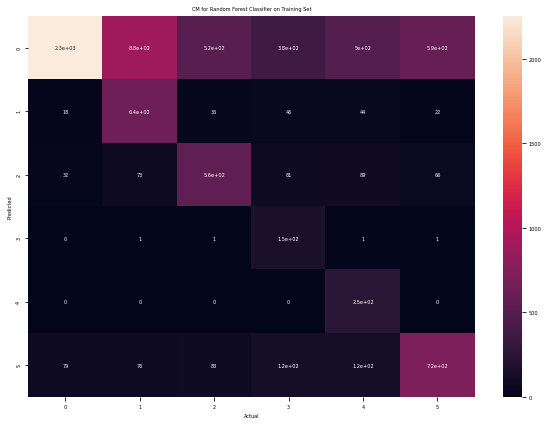

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(predictions, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Classifier on Training Set')
plt.show()

In [0]:
#Checking Performance of the model on validation set
predictions = rf.predict(X_val)
pred_proba = rf.predict_proba(X_val)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of the model is {}%.'.format(val_acc*100))

Validation Accuracy of the model is 31.71021377672209%.


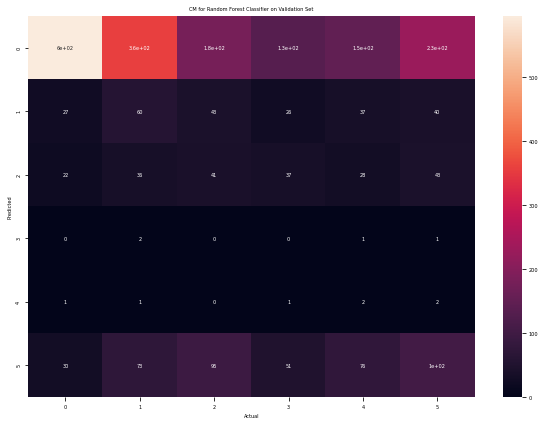

In [0]:
#Checking the models performance on the validation set
classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Classifier on Validation Set')
plt.show()

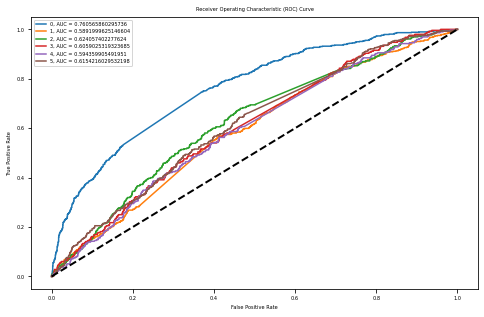

In [0]:
#Plotting ROC curve
targets = [0, 1, 2, 3, 4, 5]
plt.figure(figsize = (8,5))
for i in range(pred_proba.shape[1]):
  b_y_val = []
  for target in y_val:
    if(target == targets[i]):
      b_y_val.append(1)
    else:
      b_y_val.append(0)
  fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, i])
  auc = roc_auc_score(b_y_val, pred_proba[:, i])
  label = str(targets[i])+', AUC = '+str(auc)
  plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

Since the data is ordinal and we are fitting a nominal model It was expected that we will have a low accuracy.

To account for the ordinal nature of the targets we will try to fit a Rnadom Forest Regressor Model to make sure that the ordinal nature of the targets is captured by the model.

In [0]:
from sklearn.ensemble import RandomForestRegressor
import math

In [0]:
#Fitting a model
rf = RandomForestRegressor(n_estimators = 10, criterion='mse')
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)

#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

#Checking the accuracy of the labels predictions
train_acc = ((pred_labels == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 39.13484530106514%.


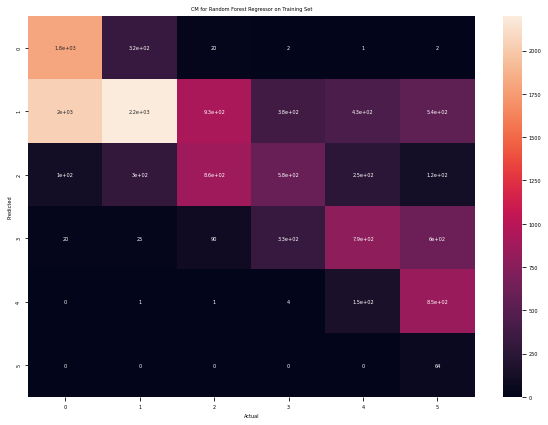

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(pred_labels, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Training Set')
plt.show()

Hyper parameter tuning using OOB score

In [0]:
ACC_score_mse = []
ACC_score_mae = []

for criterion in ['mse', 'mae']:
  for n in [20, 50, 100, 200, 500, 1000]:
    rf = RandomForestRegressor(n_estimators = n, criterion=criterion, bootstrap=True, oob_score =True)
    rf = rf.fit(X_train, y_train)
    if criterion == 'mse':
      ACC_score_mse.append(rf.oob_score_)
    elif criterion == 'mae':
      ACC_score_mae.append(rf.oob_score_)
    print('For selection criterion {} and number of estimators {}, the OOB score is {}'.format(criterion, n, np.round(rf.oob_score_, 3)))
  print('\n')

For selection criterion mse and number of estimators 20, the OOB score is 0.026
For selection criterion mse and number of estimators 50, the OOB score is 0.054
For selection criterion mse and number of estimators 100, the OOB score is 0.059
For selection criterion mse and number of estimators 200, the OOB score is 0.068
For selection criterion mse and number of estimators 500, the OOB score is 0.067
For selection criterion mse and number of estimators 1000, the OOB score is 0.069


For selection criterion mae and number of estimators 20, the OOB score is -0.009
For selection criterion mae and number of estimators 50, the OOB score is 0.019
For selection criterion mae and number of estimators 100, the OOB score is 0.026
For selection criterion mae and number of estimators 200, the OOB score is 0.032
For selection criterion mae and number of estimators 500, the OOB score is 0.037
For selection criterion mae and number of estimators 1000, the OOB score is 0.038




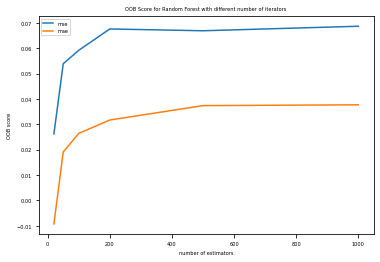

In [0]:
#plotting the oob scores
x = [20, 50, 100, 200, 500, 1000]
plt.plot(x, ACC_score_mse, label = 'mse')
plt.plot(x, ACC_score_mae, label = 'mae')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

Using the best set of parameters

(i.e. criterion = 'mse', n_estimators = 500)

In [0]:
#Fitting a model
rf = RandomForestRegressor(n_estimators = 500, max_depth = 15, criterion='mse')
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train)

#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

#Checking the accuracy of the labels predictions
train_acc = ((pred_labels == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 34.358669833729216%.


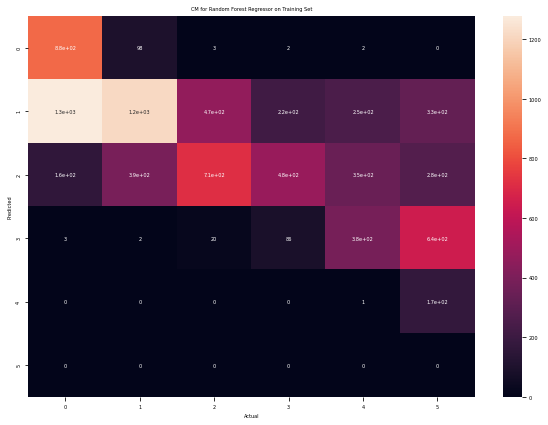

In [0]:
#Checking the models performance on the training set
classes = np.unique(y_train)
cm = confusion_matrix(pred_labels, y_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Training Set')
plt.show()

In [0]:
#Checking Performance of the model on validation set
predictions = rf.predict(X_val)
#pred_proba = rf.predict_proba(X_val)
#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

val_acc = ((pred_labels == y_val).sum())/len(predictions)
print('Validation Accuracy of the model is {}%.'.format(val_acc*100))

Validation Accuracy of the model is 21.971496437054633%.


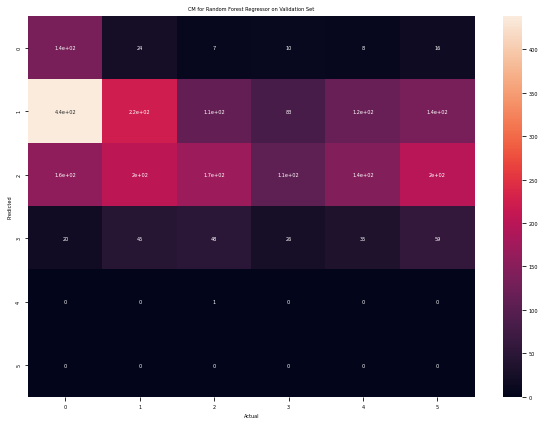

In [0]:
#Checking the models performance on the validation set
classes = np.unique(y_val)
cm = confusion_matrix(pred_labels, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Validation Set')
plt.show()

In [0]:
#Checking Performance of the model on test set
predictions = rf.predict(X_test)
#pred_proba = rf.predict_proba(X_val)
#rounding the predictions to nearest integer
pred_labels = []
for pred in predictions:
  pred_labels.append(math.floor(pred))

test_acc = ((pred_labels == y_test).sum())/len(predictions)
print('Test Accuracy of the model is {}%.'.format(test_acc*100))

Test Accuracy of the model is 23.545706371191137%.


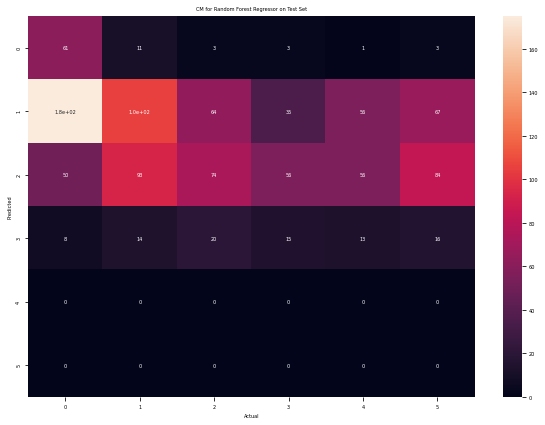

In [0]:
#Checking the models performance on the test set
classes = np.unique(y_test)
cm = confusion_matrix(pred_labels, y_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CM for Random Forest Regressor on Test Set')
plt.show()

Even though the accuracy of the model is less, the confusion matrix does show almost same prediction for all the actual classes. 

Since the dataset had a lot of nan inputs it is possible that some of the nan inputs belonged to some other company size but since the input field was nan we clubbed it in salary bucket 1.

In [0]:
#Now checking the weights of all the features

company_size_wt_skill = { }
wts = []
for i in range(len(List_of_features)):
  x_in = np.zeros(len(List_of_features))
  x_in[i] = 1
  x_in = x_in.reshape(1, len(List_of_features))
  company_size_wt_skill[rf.predict(x_in)[0]] = new_col_names[i]
  wts.append(rf.predict(x_in)[0])
  print("Weight of skill {} is {}".format(new_col_names[i], round(rf.predict(x_in)[0], 3)))

Weight of skill Python is 1.699
Weight of skill R is 1.887
Weight of skill SQL is 2.271
Weight of skill C is 0.768
Weight of skill C++ is 0.432
Weight of skill Java is 1.085
Weight of skill Javascript is 1.878
Weight of skill TypeScript is 1.983
Weight of skill Bash is 1.931
Weight of skill MATLAB is 1.466
Weight of skill No common Programming is 1.887
Weight of skill ggplot is 1.918
Weight of skill Matplotlib is 1.585
Weight of skill Altair is 2.201
Weight of skill Shiny is 1.822
Weight of skill D3.js is 2.099
Weight of skill Plotly is 2.345
Weight of skill Bokeh is 2.292
Weight of skill Seaborn is 1.943
Weight of skill Geoplotlib is 1.905
Weight of skill Leaflet/Folium is 1.984
Weight of skill No common visualization is 1.798
Weight of skill Scikit-learn is 1.862
Weight of skill Tensorflow is 1.502
Weight of skill Keras is 1.843
Weight of skill Random Forest is 2.704
Weight of skill Xgboost is 2.038
Weight of skill Pytorch is 1.934
Weight of skill Carcet is 2.142
Weight of skill Ligh

In [0]:
wts.sort(reverse = True)
for wt in wts:
  print("Skill {}, has weight {}".format(company_size_wt_skill[wt], wt))

Skill Random Forest, has weight 2.7043377497520065
Skill Plotly, has weight 2.3450638036610694
Skill Bokeh, has weight 2.2920707221627628
Skill SQL, has weight 2.2714489005810083
Skill Fast.ai, has weight 2.258302582100019
Skill Altair, has weight 2.2005763558137845
Skill Automated Data Augmentation, has weight 2.1456357458467905
Skill Carcet, has weight 2.1419043804244353
Skill D3.js, has weight 2.0987759071850345
Skill Automated Feature Engineering, has weight 2.0844210469932363
Skill Automated Hypreparameter Tuning, has weight 2.067212167033785
Skill Evolutionary Approaches, has weight 2.0586334725166906
Skill Xgboost, has weight 2.037567801008773
Skill No common algorithm, has weight 2.0263917471178865
Skill Gradient Boositng Machines, has weight 2.0000353193636067
Skill Automated Full ML Pipelines, has weight 1.999875466412743
Skill Leaflet/Folium, has weight 1.9840562033090514
Skill TypeScript, has weight 1.982598956441339
Skill Linear Models, has weight 1.9730334596070227
Skill 

No common field of any thing means that the user didn't use of any of the options proivded to pick from for that particular question but then he/she might have used others to enter other techniques not there in the list which we have not encoded.

In [0]:
#Since we only want to select common and import skills for a data-scientist
#Only considering skills with over a 2000 sample points
#Skills in order of deacreasing weights with skills other than no common skills
no_common = ["No common Programming", "No common ML Tools", "No common algorithm", "No common toolkit", "No common visualization", "Education Level"]
wts.sort(reverse = True)
w_with_skills = []
for wt in wts:
  if(len(X[X[company_size_wt_skill[wt]] == 1]) > 2000) and company_size_wt_skill[wt] not in no_common:
    #print(len(X[X[salary_wt_skill[wt]] == 1]))
    print("Skill {}, has weight {}".format(company_size_wt_skill[wt], wt))
    w_with_skills.append([company_size_wt_skill[wt], wt])

no_01 = ["Education Level"]
print('\n')
for wt in wts:
  if company_size_wt_skill[wt] in no_01:
    #print(len(X[X[salary_wt_skill[wt]] == 1]))
    print("{}, has weight {}".format(company_size_wt_skill[wt], wt))
    w_with_skills.append([company_size_wt_skill[wt], wt])


Skill Random Forest, has weight 2.7043377497520065
Skill Plotly, has weight 2.3450638036610694
Skill SQL, has weight 2.2714489005810083
Skill Xgboost, has weight 2.037567801008773
Skill Gradient Boositng Machines, has weight 2.0000353193636067
Skill Linear Models, has weight 1.9730334596070227
Skill CNN, has weight 1.9603898388070025
Skill Bayesian Approaches, has weight 1.9499917873523687
Skill Automated Model Selection, has weight 1.9452958455720226
Skill Seaborn, has weight 1.94289336125773
Skill Decision Trees and Random Forest, has weight 1.9394854062114082
Skill Dense NNs, has weight 1.9361557595441115
Skill Pytorch, has weight 1.9335172403115772
Skill RNN, has weight 1.9321924809297168
Skill ggplot, has weight 1.9177440532757648
Skill R, has weight 1.8869649845192418
Skill Scikit-learn, has weight 1.8618707244117934
Skill Keras, has weight 1.8434579387195655
Skill Python, has weight 1.6986989851097387
Skill Matplotlib, has weight 1.5853274701351123
Skill Tensorflow, has weight 1

In [0]:
#Another way of obtaining the same thing
skills_importance = {}
imp = []
skills_importance_list = []
for x,y in zip(rf.feature_importances_, new_col_names):
  skills_importance[x] = y
  imp.append(x)

#Scaling it just to make the importance easier to compare
#printing in the correct order
imp.sort(reverse = True)
for importance in imp:
  if (skills_importance[importance] not in no_common) and (len(X[X[skills_importance[importance]] == 1]) > 2000):
    print('{}: {}'.format(skills_importance[importance], round(importance*100, 3))) 
    skills_importance_list.append([skills_importance[importance], round(importance*100, 3)])

print('\n')
for importance in imp:
  if skills_importance[importance] in no_01:
    print('{}: {}'.format(skills_importance[importance], round(importance*100, 3))) 
    skills_importance_list.append([skills_importance[importance], round(importance*100, 3)])

SQL: 8.344
Matplotlib: 2.779
Gradient Boositng Machines: 2.541
Random Forest: 2.481
Seaborn: 2.434
Plotly: 2.408
CNN: 2.369
Decision Trees and Random Forest: 2.347
Tensorflow: 2.298
R: 2.285
Bayesian Approaches: 2.27
Pytorch: 2.171
Keras: 2.139
ggplot: 2.043
RNN: 2.015
Dense NNs: 2.009
Automated Model Selection: 2.003
Linear Models: 1.99
Xgboost: 1.949
Scikit-learn: 1.797
Python: 1.301


Education Level: 0.496


In [0]:
weights_skills_v_com_size = pd.DataFrame(w_with_skills,columns=['Skill','Importance'])
weights_skills_v_com_size.to_csv(r'Com_size_Skills_weight.csv', index = False)
importance_skills_v_com_size = pd.DataFrame(skills_importance_list,columns=['Skill','Importance'])
importance_skills_v_com_size.to_csv(r'Com_size_Skills_importance.csv', index = False)